ЗАПУСК АНАЛИЗА 5 МОДЕЛЕЙ С ФОКУСОМ НА MINIMIZING MSE И БОРЬБУ С ПЕРЕОБУЧЕНИЕМ
МОДЕЛИ ДЛЯ ОЦЕНКИ: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble
Размер тестовой выборки: 0.3
Динамический подбор параметров: ВКЛЮЧЕН
ОСНОВНОЙ КРИТЕРИЙ: MINIMIZING MEAN SQUARED ERROR (MSE) + БОРЬБА С ПЕРЕОБУЧЕНИЕМ
ЗАГРУЗКА И АНАЛИЗ ДАННЫХ О НЕДВИЖИМОСТИ
Размер датасета: (500, 12)
Колонки: ['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 'Distance_to_Center', 'Price']
Удаляем столбец ID

Целевая переменная: Price

УЛУЧШЕННОЕ УДАЛЕНИЕ ВЫБРОСОВ ДЛЯ КАЖДОГО ПРИЗНАКА
Анализ выбросов по признакам:
   Square_Feet: 0 выбросов (0.00%)
   Num_Bedrooms: 0 выбросов (0.00%)
   Num_Bathrooms: 0 выбросов (0.00%)
   Num_Floors: 0 выбросов (0.00%)
   Year_Built: 0 выбросов (0.00%)
   Has_Garden: 0 выбросов (0.00%)
   Has_Pool: 0 выбросов (0.00%)
   Garage_Size: 0 выбросов (0.00%)
   Location_Score: 0 выбросов (0.00%)
   Distance_to_C

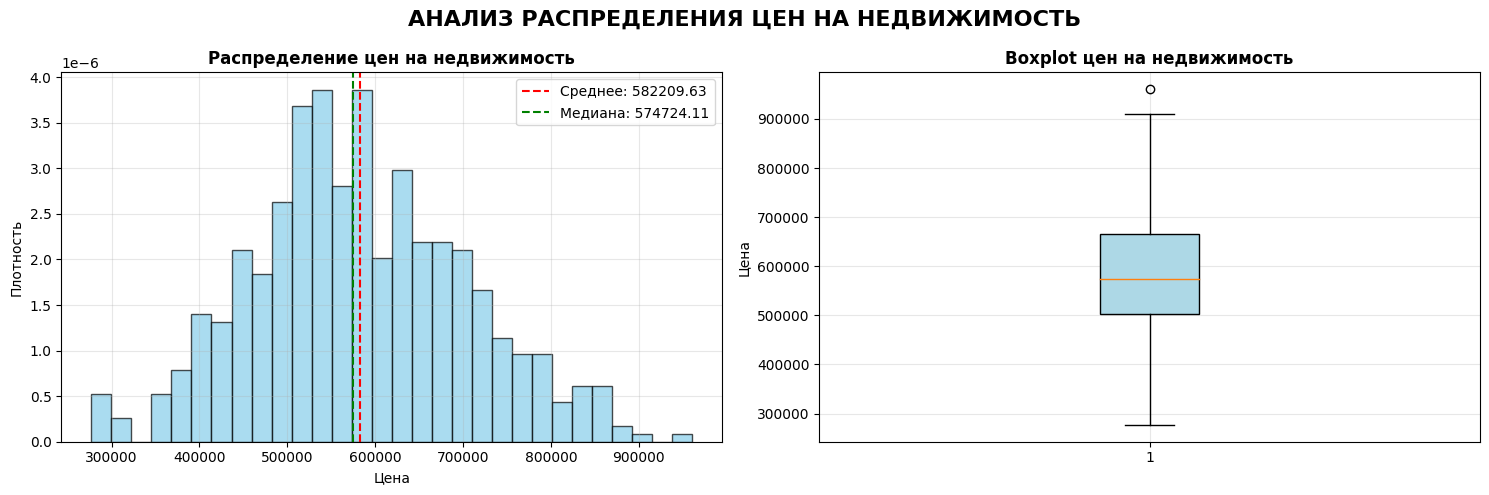

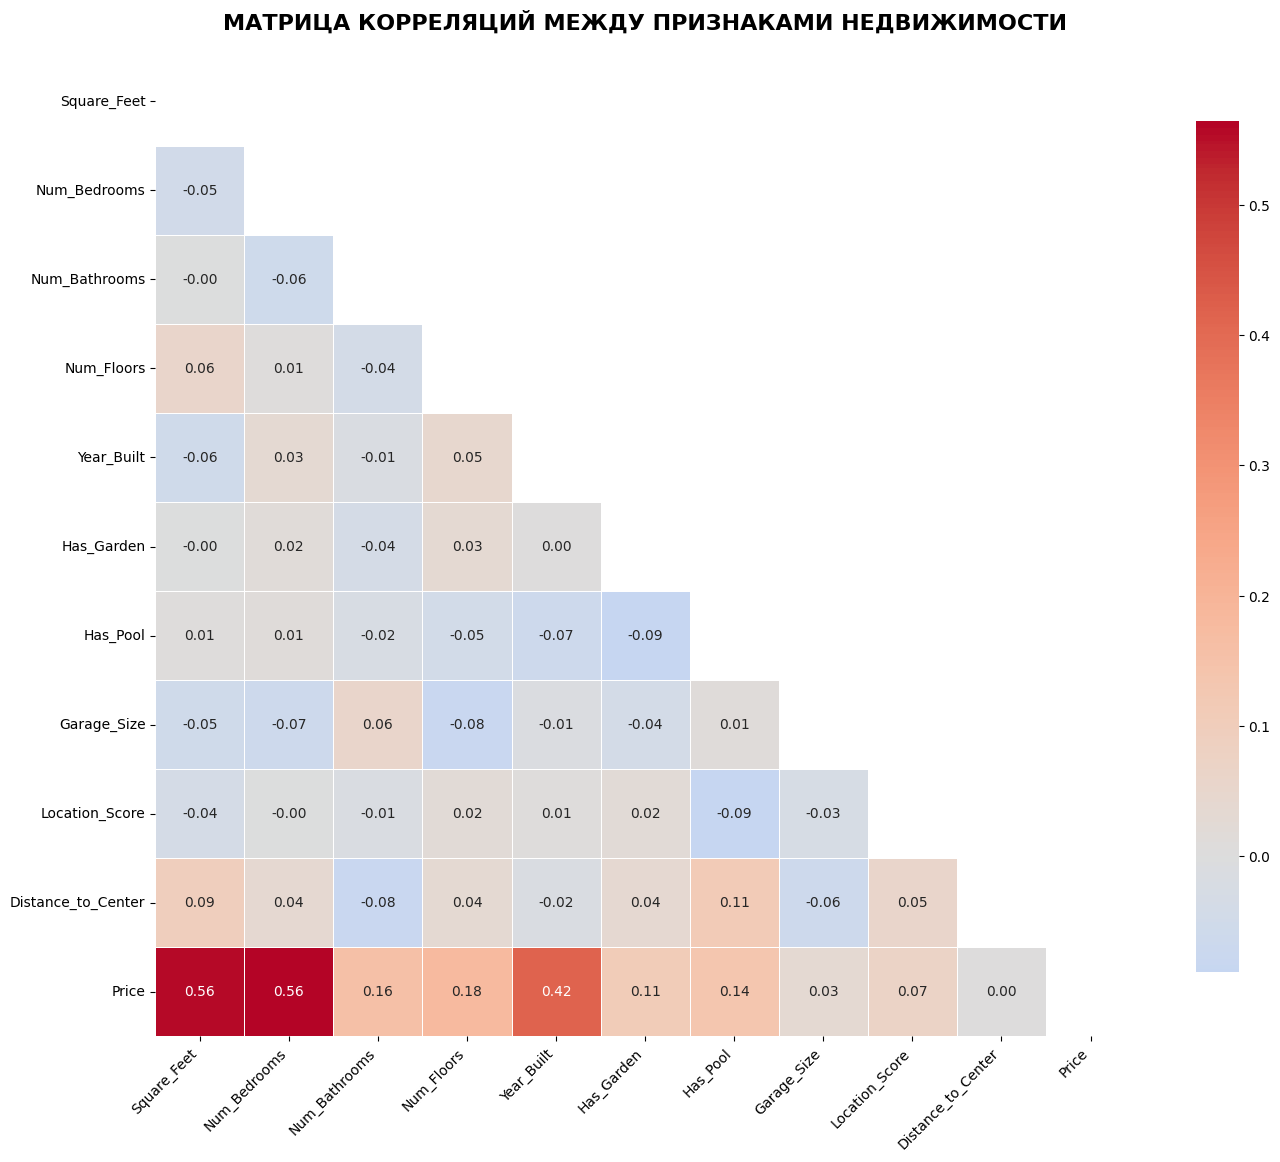


КОРРЕЛЯЦИИ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (Price):
   Num_Bedrooms: 0.5640
   Square_Feet: 0.5586
   Year_Built: 0.4183
   Num_Floors: 0.1774
   Num_Bathrooms: 0.1567
   Has_Pool: 0.1366
   Has_Garden: 0.1092
   Location_Score: 0.0713
   Garage_Size: 0.0321
   Distance_to_Center: 0.0007

ТОП-6 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ЦЕНОЙ:
   Num_Bedrooms: 0.5640
   Square_Feet: 0.5586
   Year_Built: 0.4183
   Num_Floors: 0.1774
   Num_Bathrooms: 0.1567
   Has_Pool: 0.1366


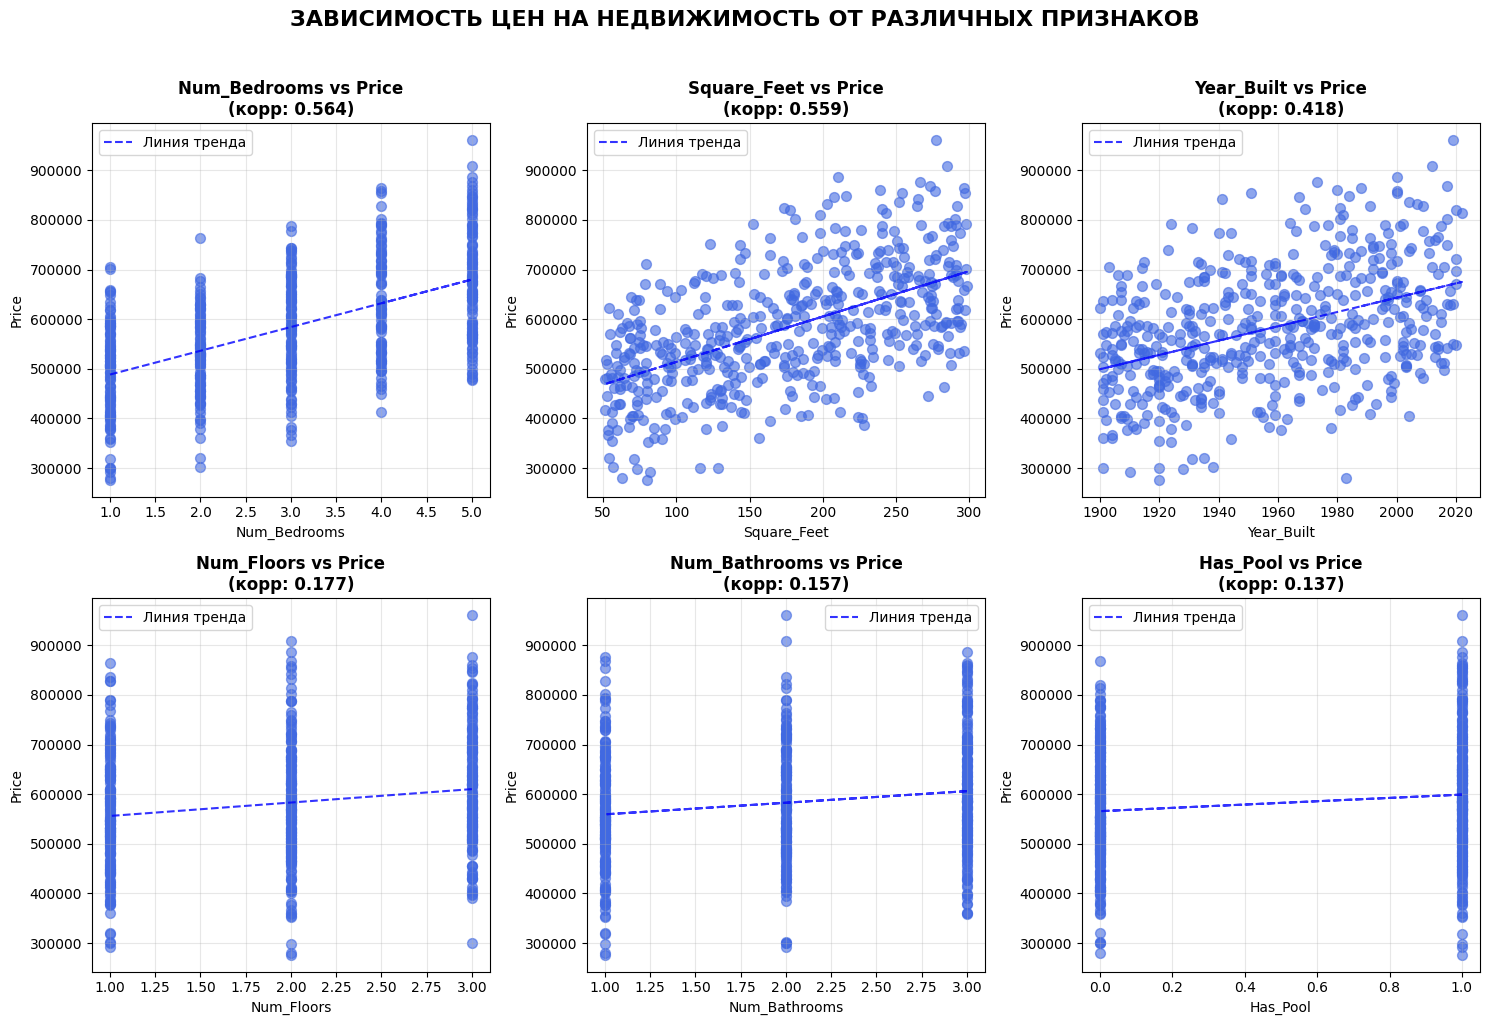


РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ


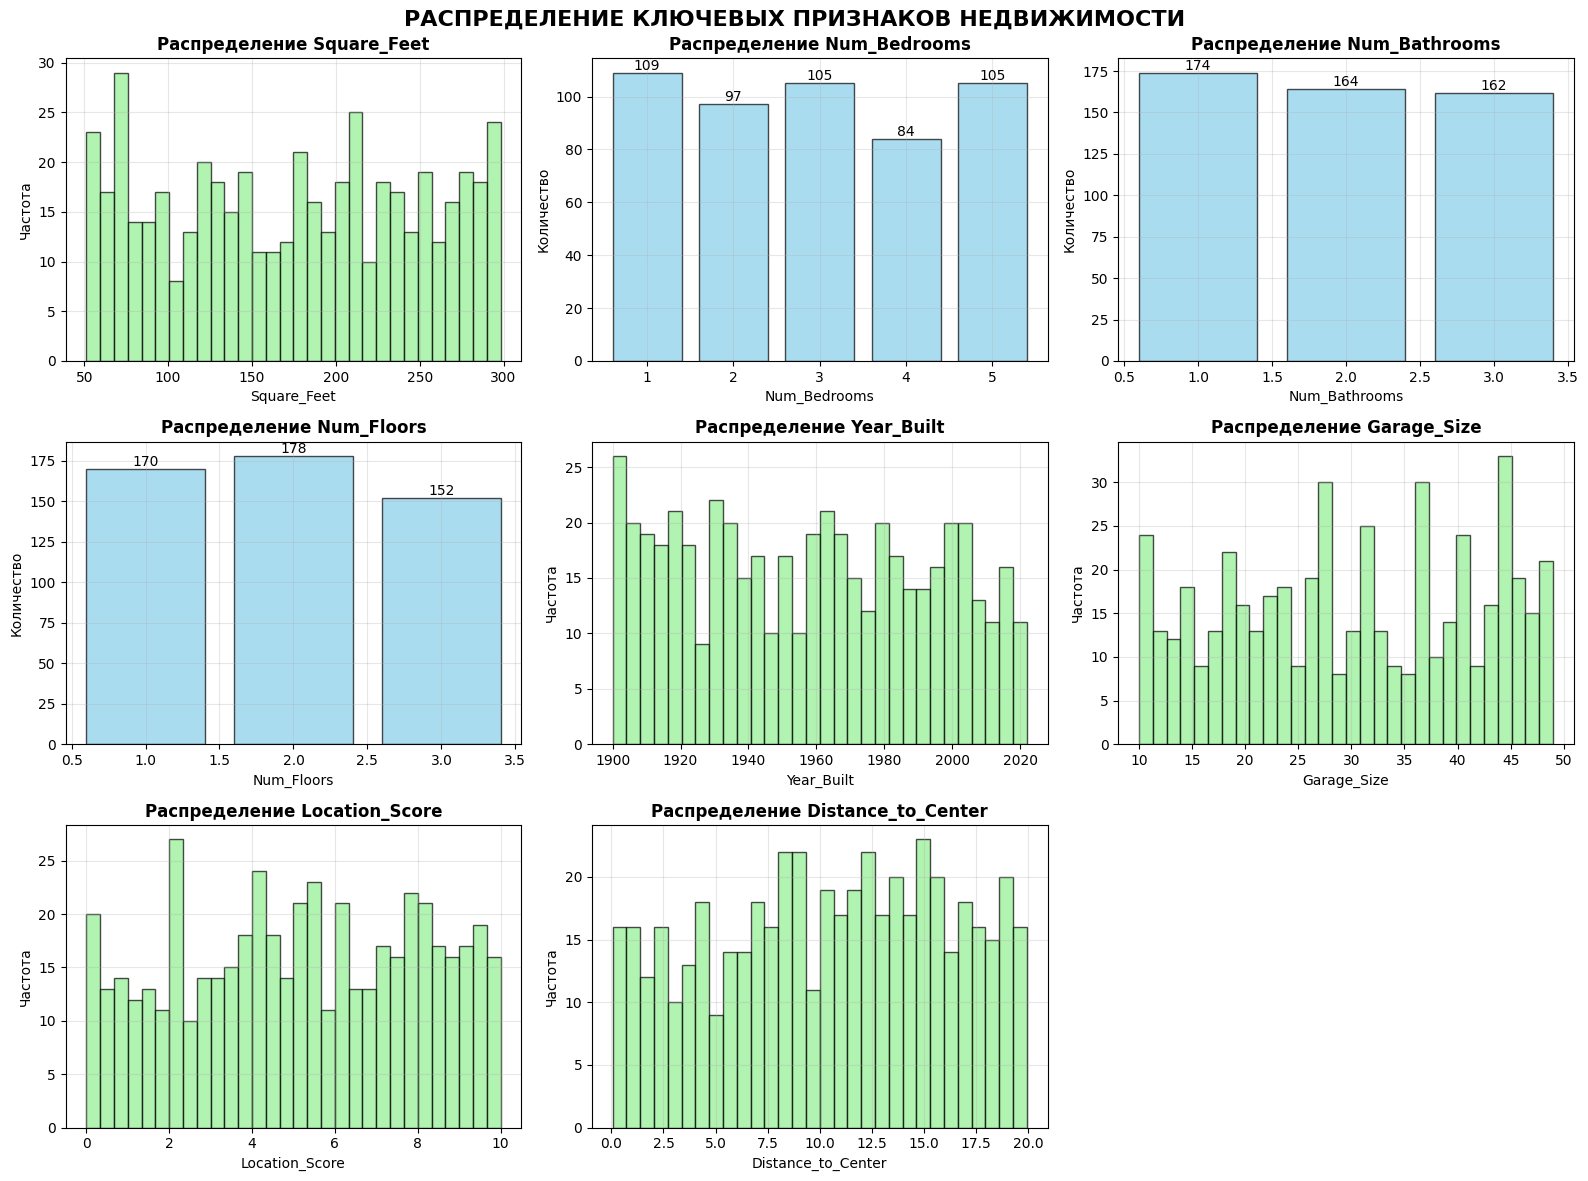


СОЗДАНИЕ 5 МОДЕЛЕЙ ДЛЯ ОЦЕНКИ
Модели: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble
Созданы базовые модели для оценки:
   CatBoost
   XGBoost
   ElasticNet
   Lasso

Включен динамический подбор параметров для минимизации MSE и переобучения

ОБУЧЕНИЕ И ОЦЕНКА 5 МОДЕЛЕЙ С ФОКУСОМ НА MINIMIZING MSE

ДИНАМИЧЕСКИЙ ПОДБОР ГИПЕРПАРАМЕТРОВ (ФОКУС НА MSE И БОРЬБА С ПЕРЕОБУЧЕНИЕМ)
Подбор параметров для CatBoost...
   Лучшие параметры: {'subsample': 0.9, 'random_strength': 2, 'min_data_in_leaf': 10, 'learning_rate': 0.08, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 4, 'colsample_bylevel': 0.7, 'bagging_temperature': 0.5}
   Лучший MSE: 1071078440.04
Подбор параметров для XGBoost...
   Лучшие параметры: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.9}
   Лучший MSE: 1114489716.44
Подбор параметров для ElasticNet...
   Лучшие параметры: {'max_iter': 2000, 'l1_ratio': 0.99, 'alpha': 0.001}
 

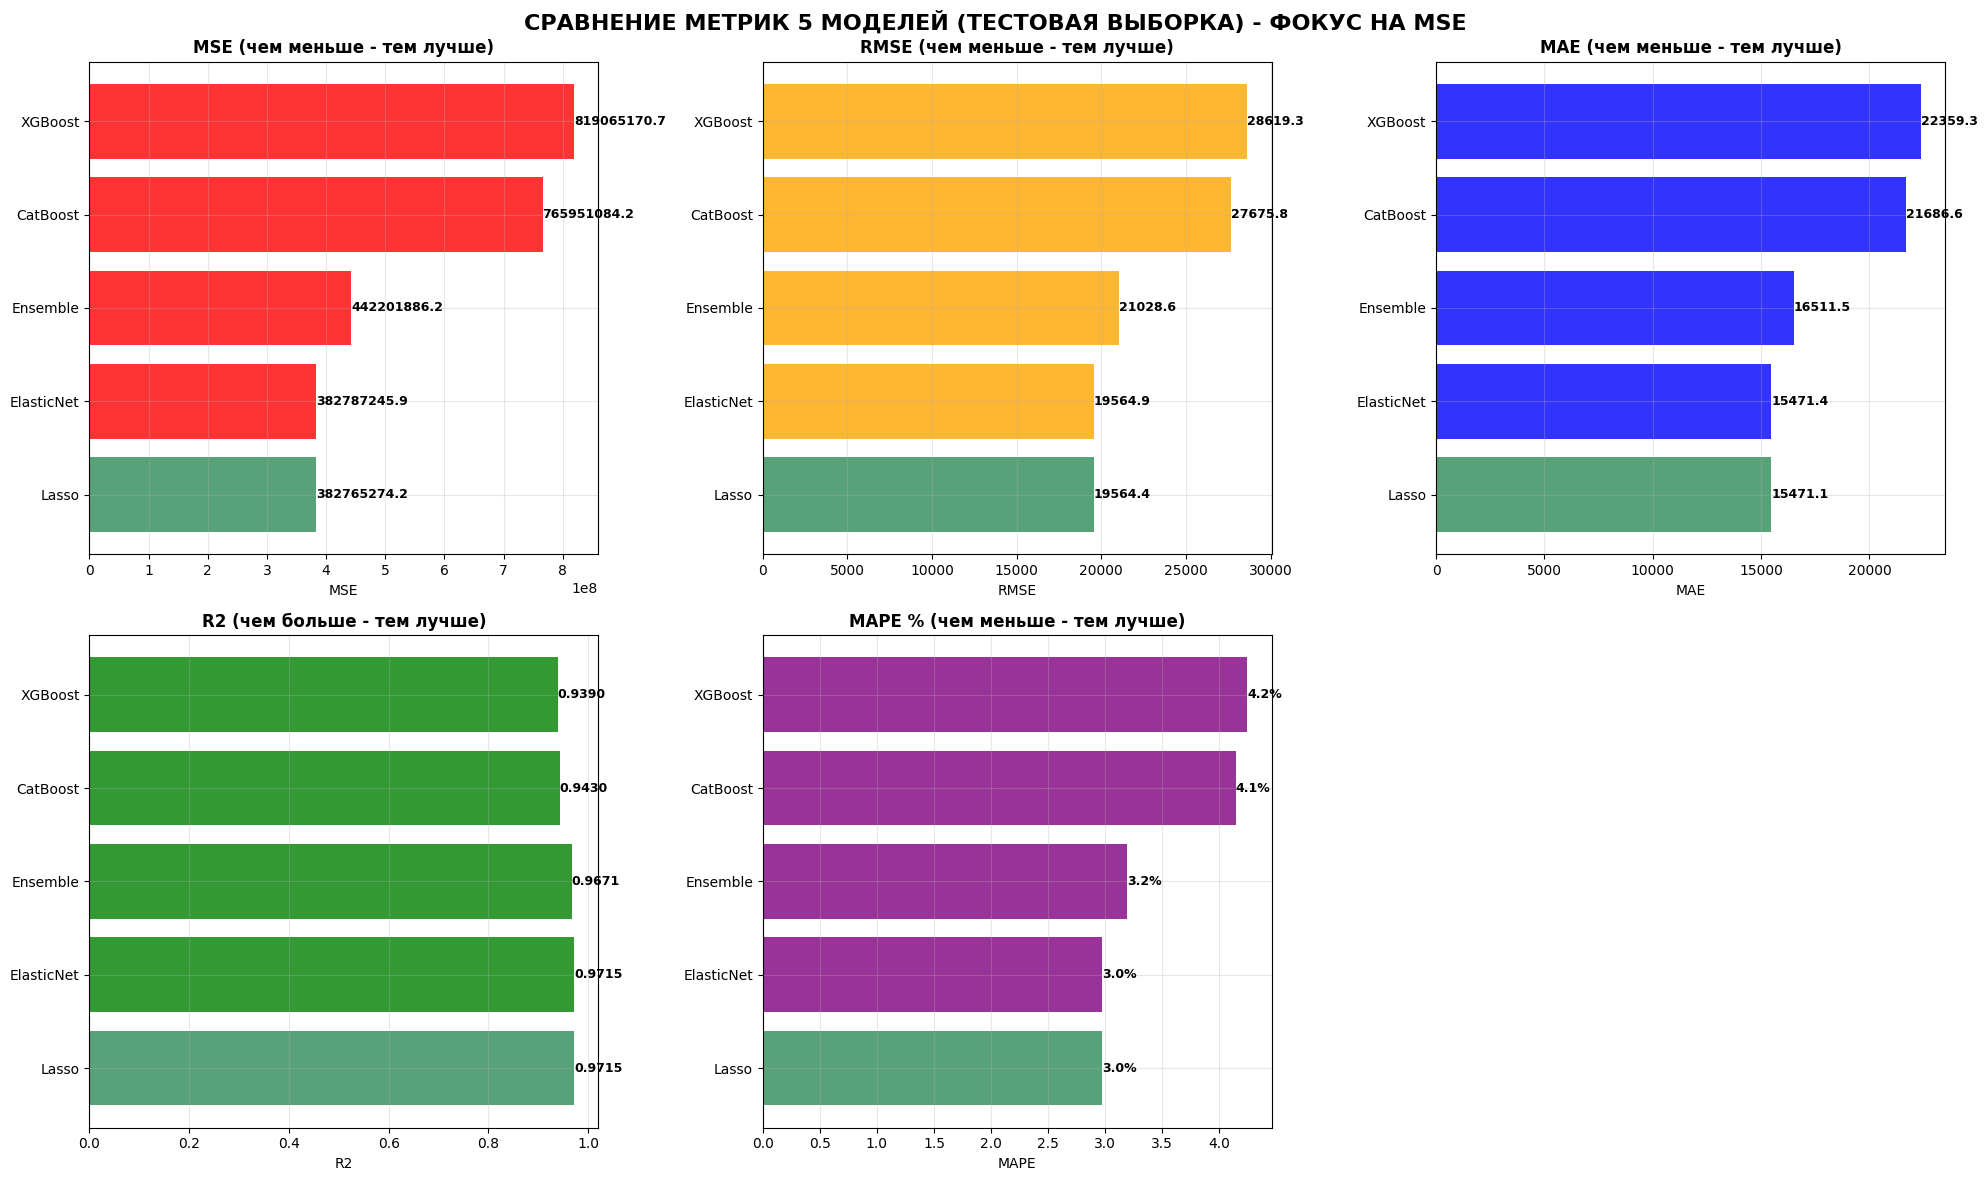

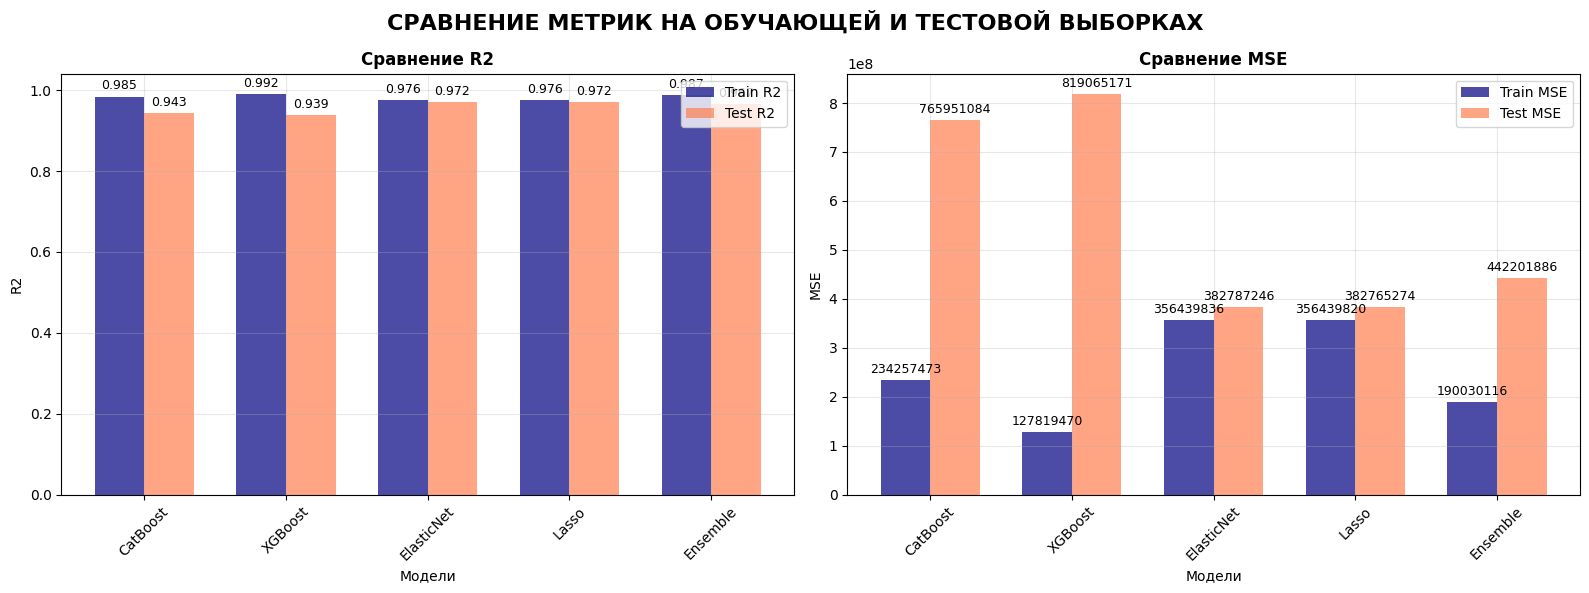

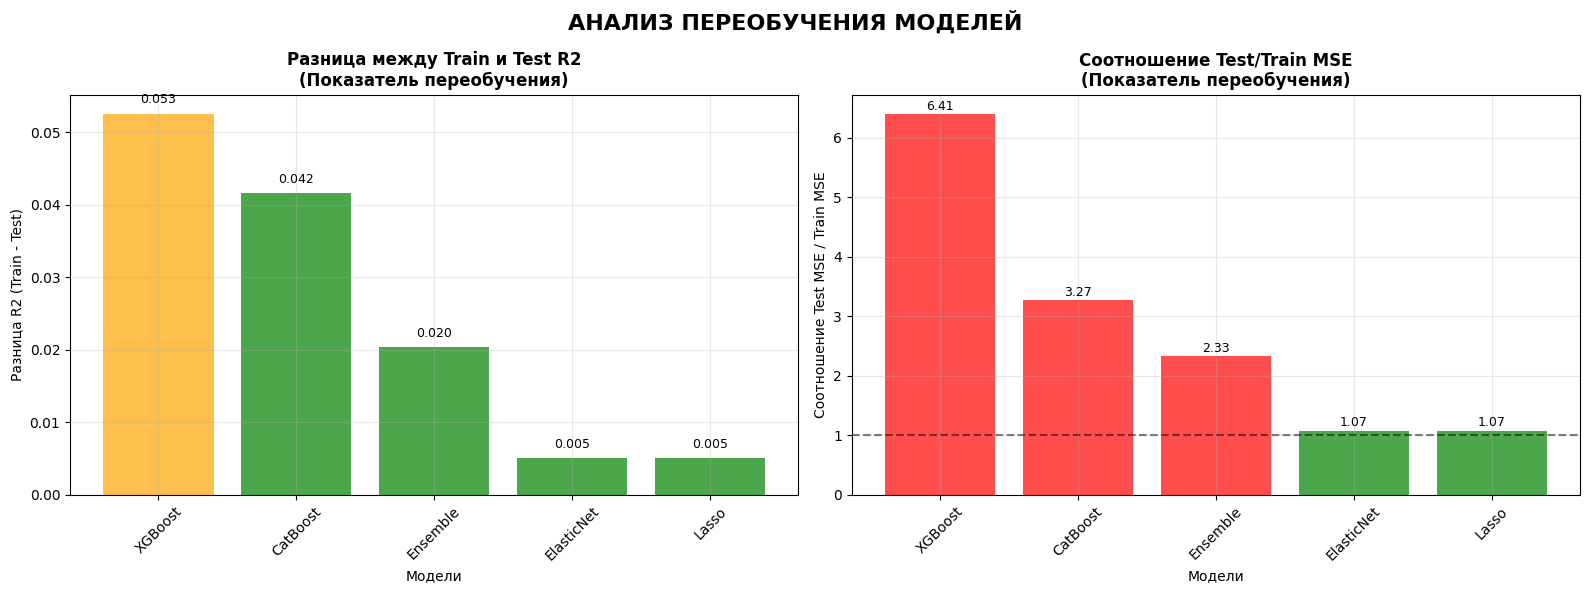


ГРАФИКИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ ДЛЯ ВСЕХ МОДЕЛЕЙ


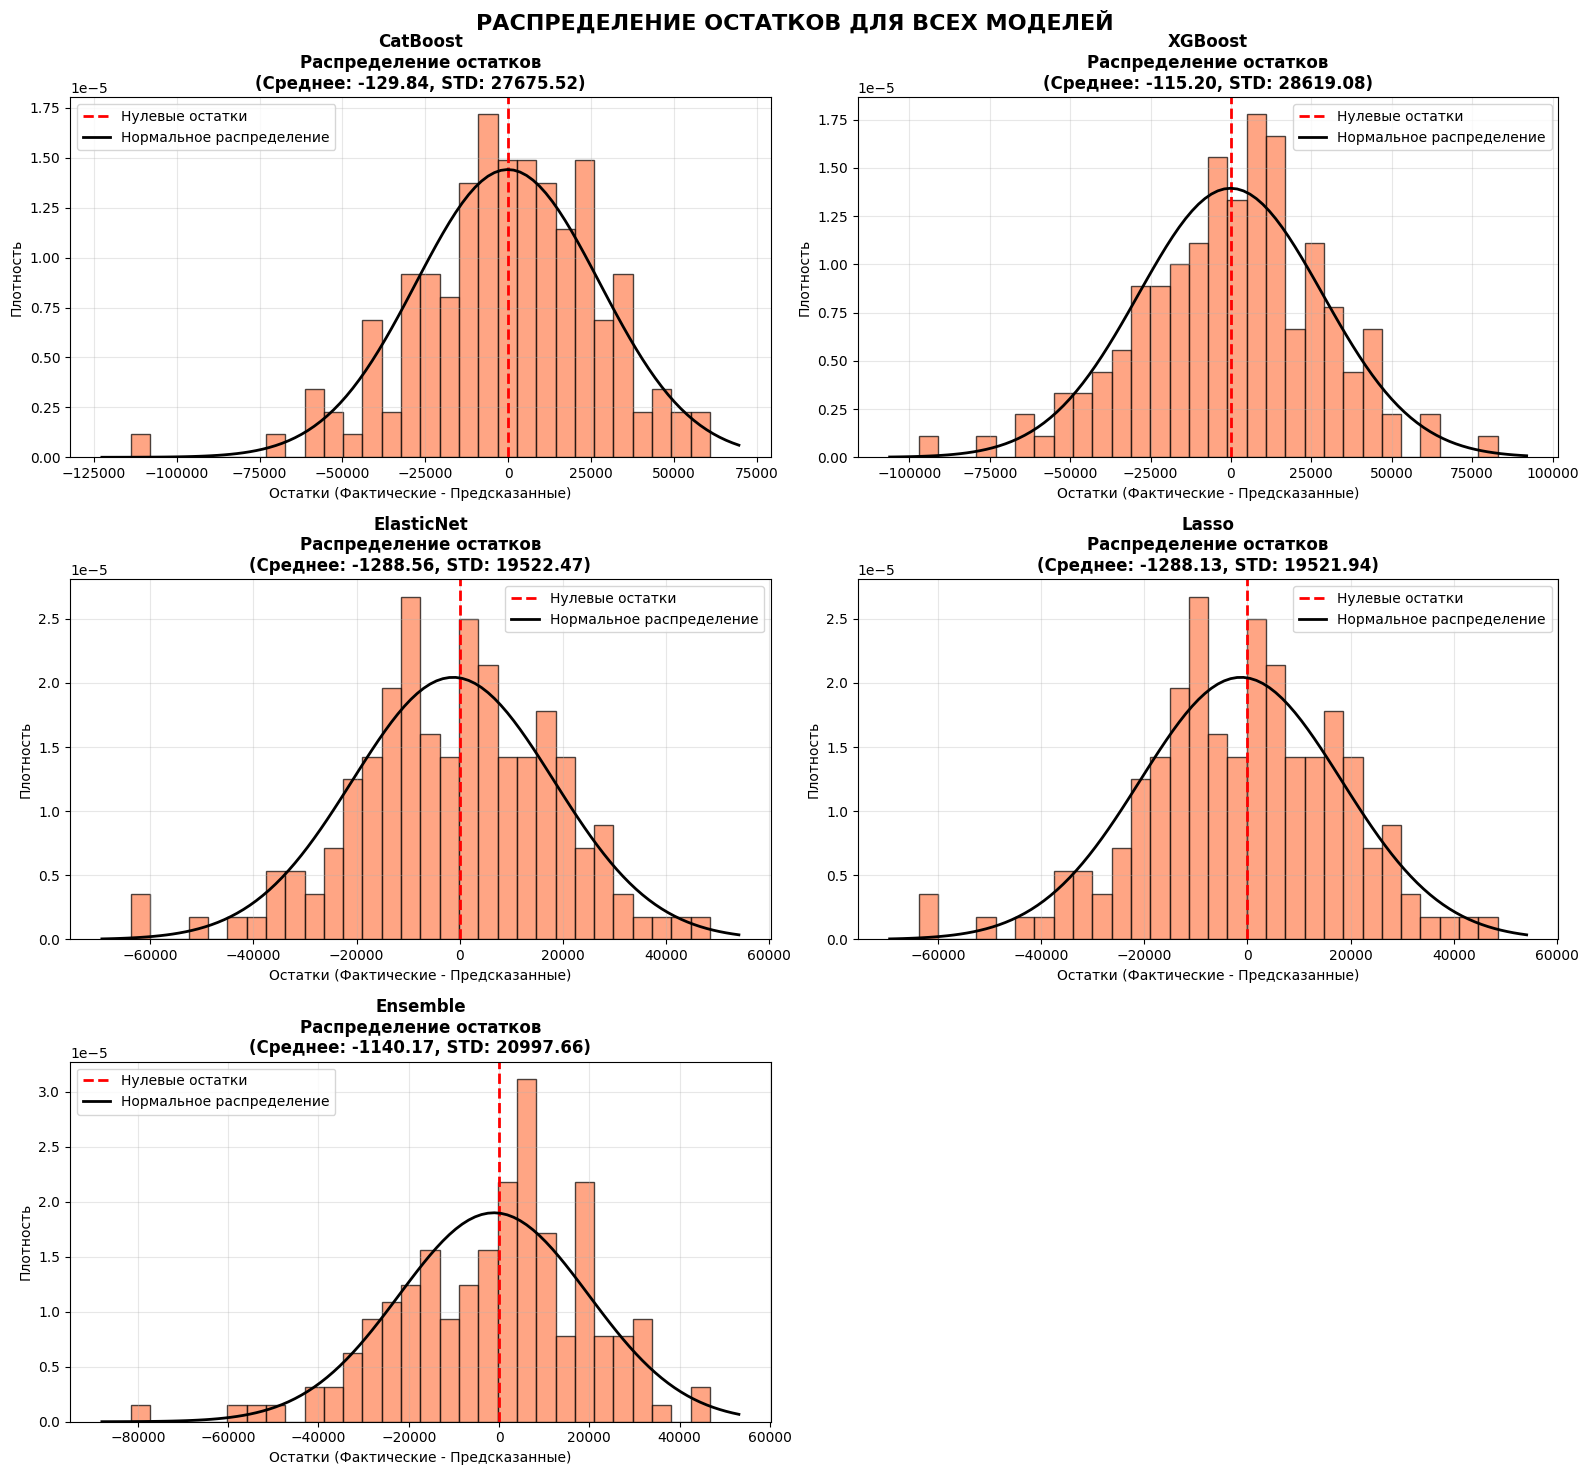


АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ:
   CatBoost: p-value = 0.0439 (не нормальное)
   XGBoost: p-value = 0.6469 (нормальное)
   ElasticNet: p-value = 0.3127 (нормальное)
   Lasso: p-value = 0.3131 (нормальное)
   Ensemble: p-value = 0.0145 (не нормальное)


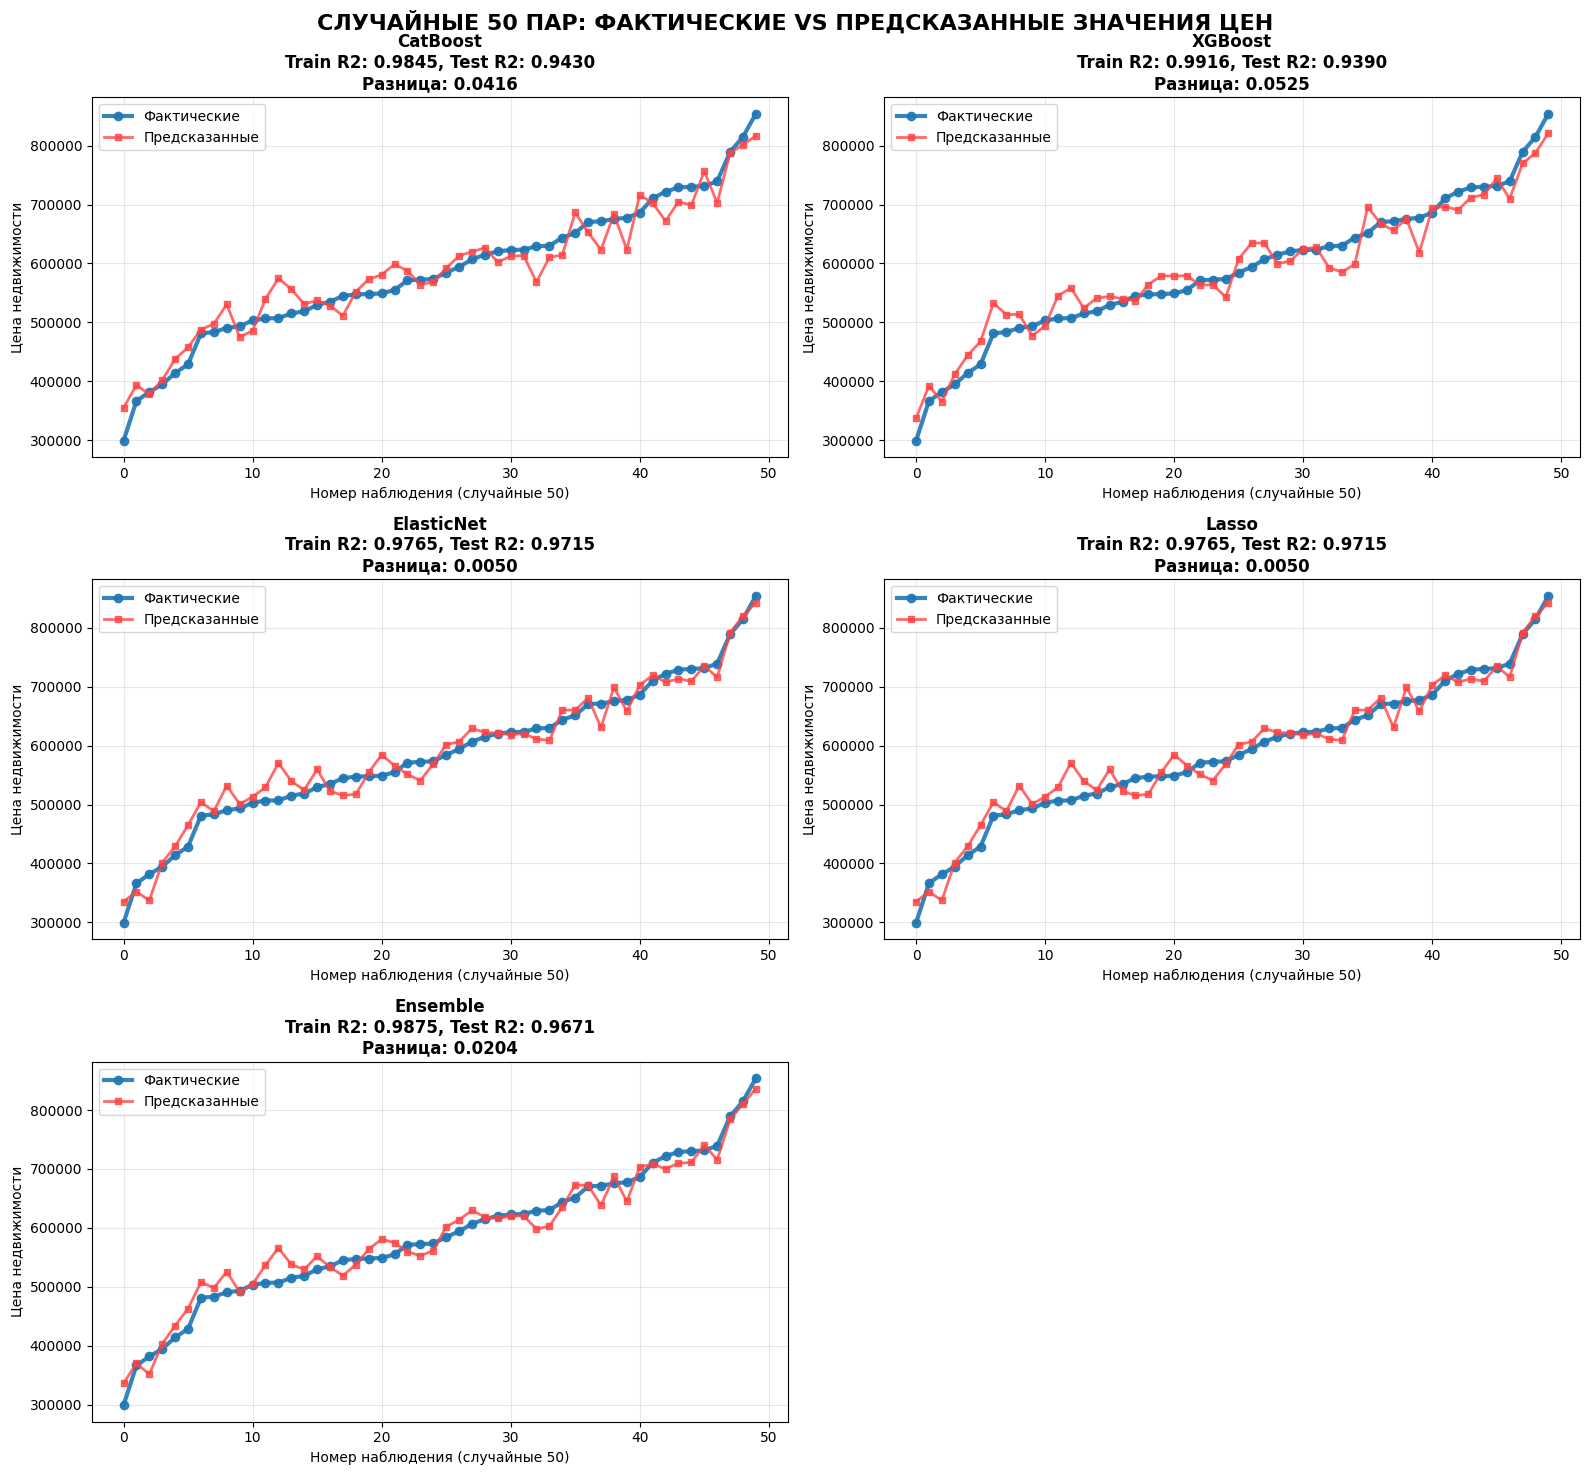

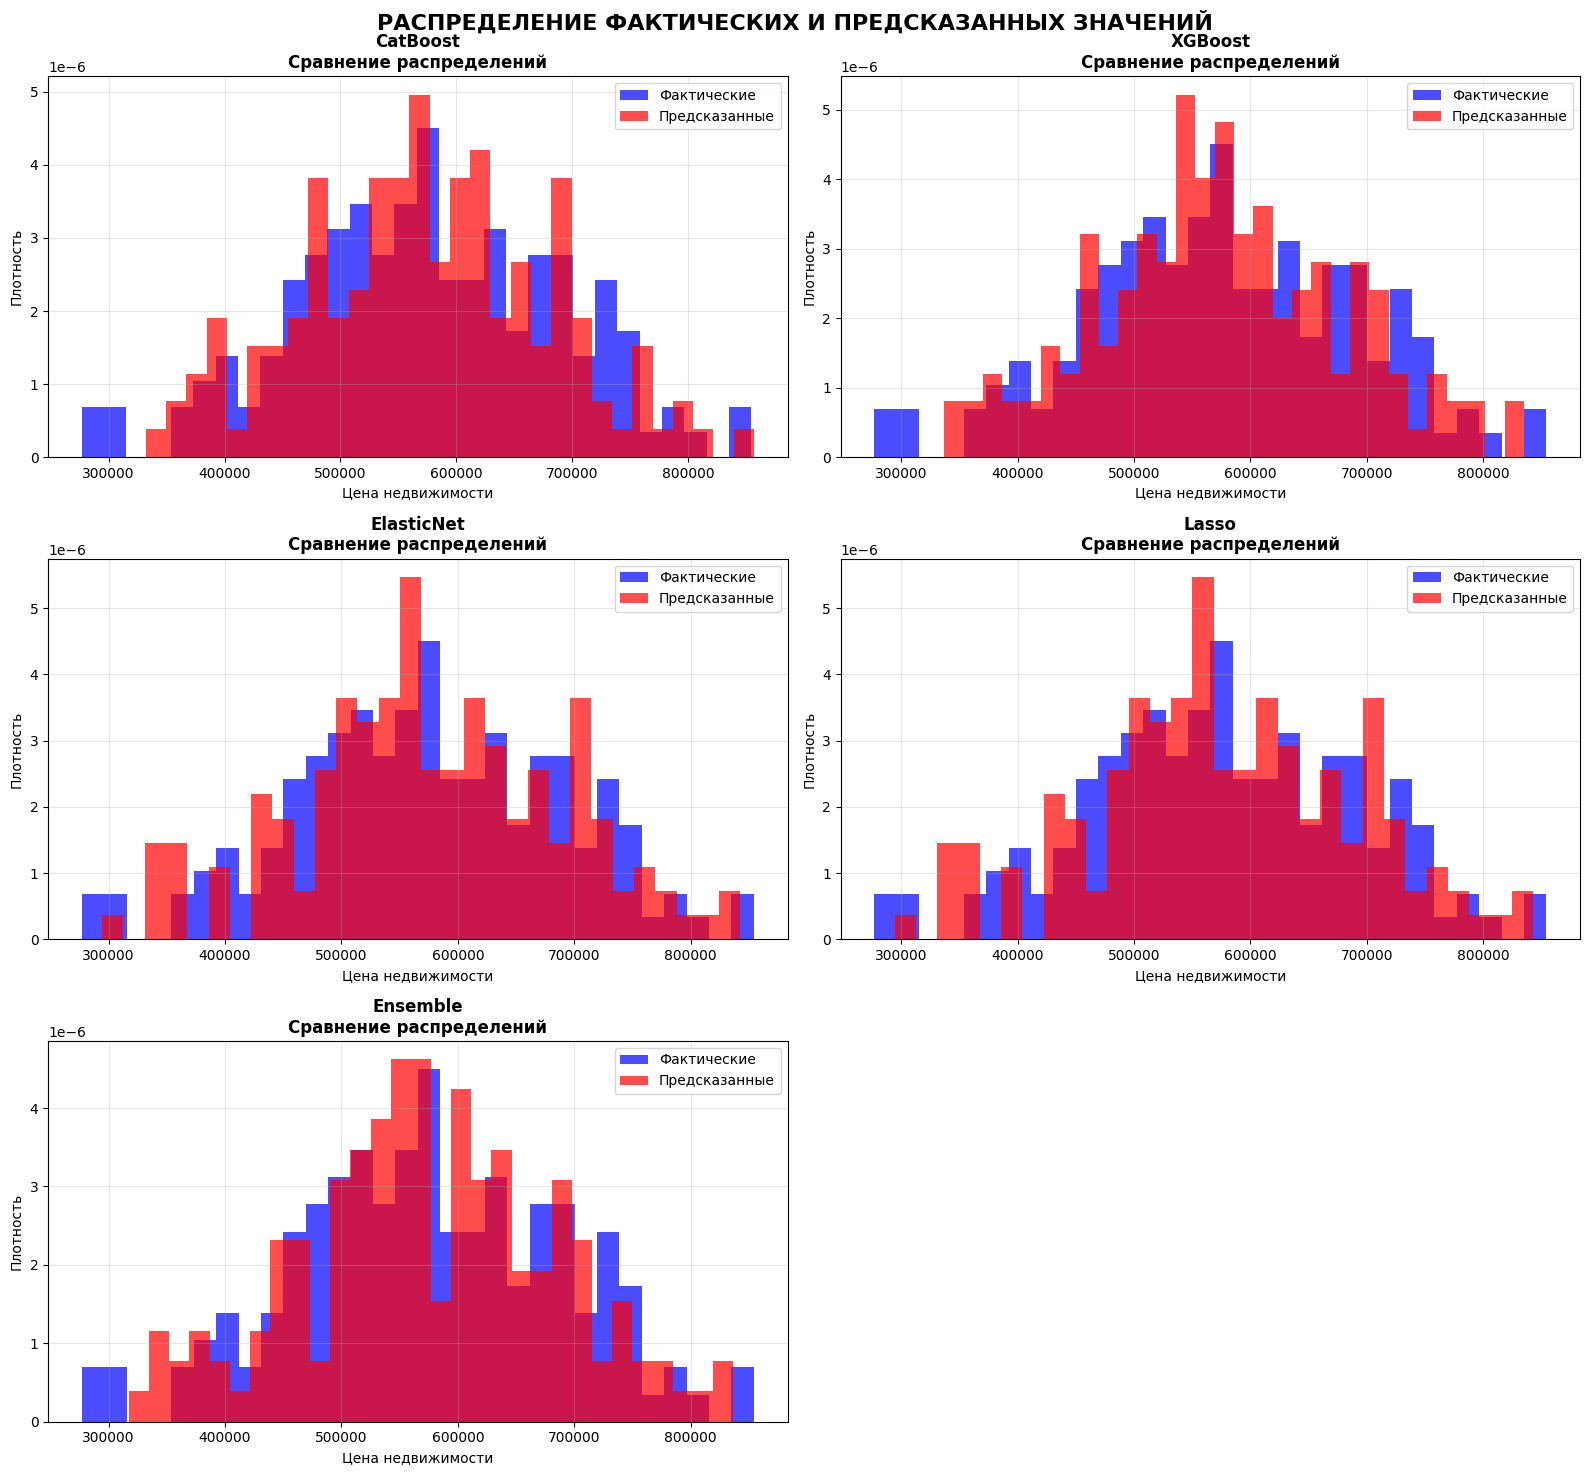

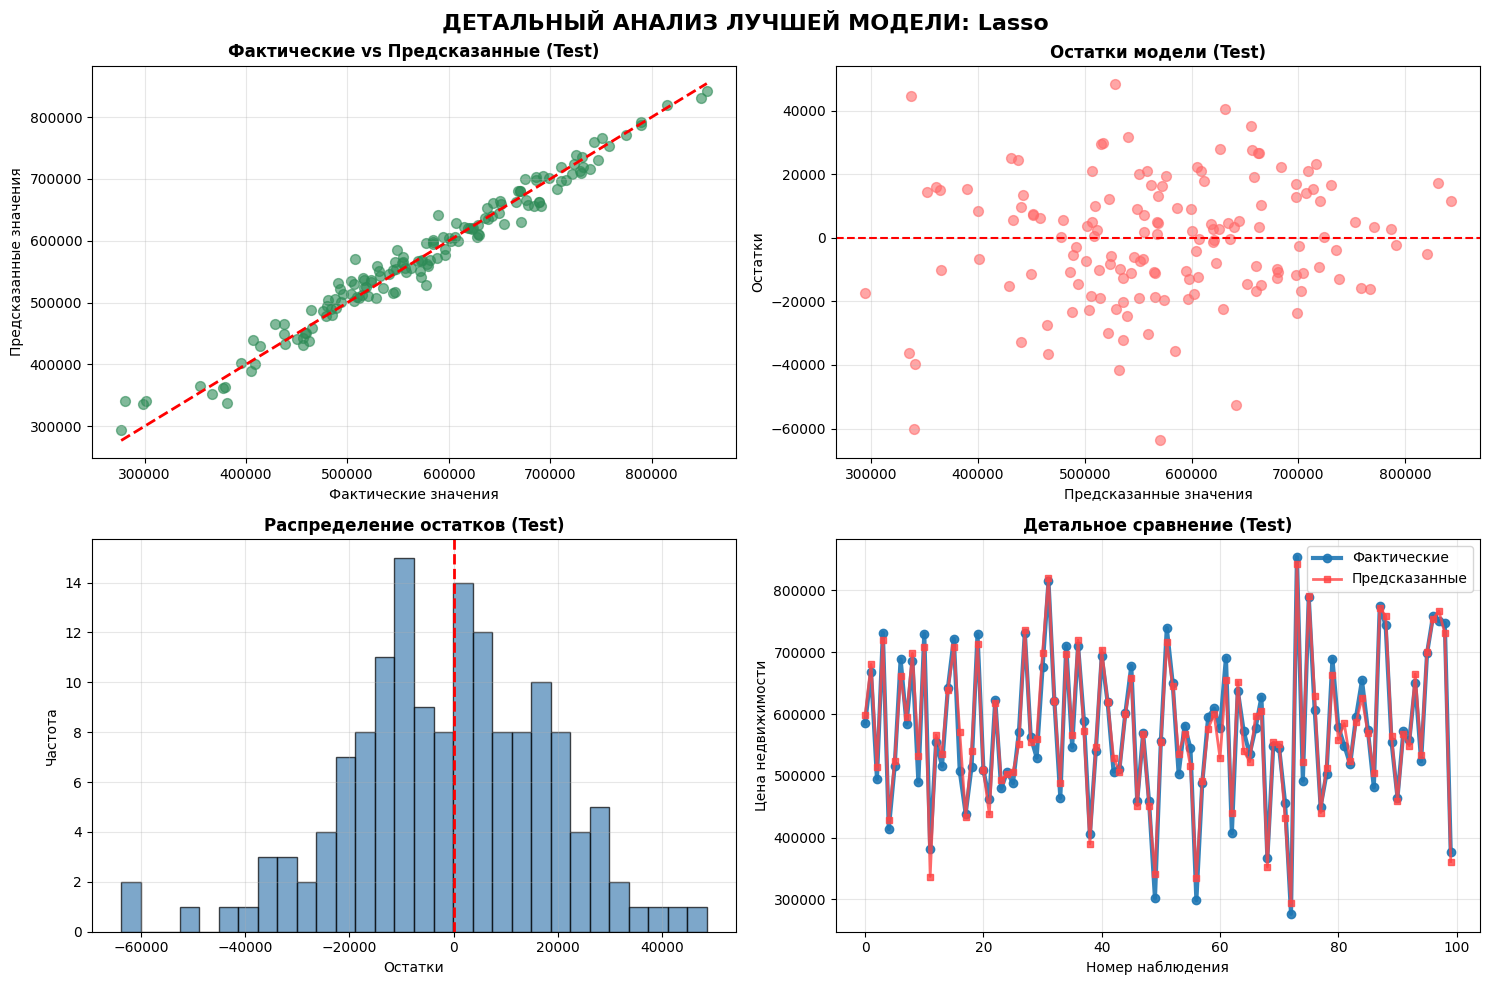


КОМПЛЕКСНЫЙ ОТЧЕТ ПО 5 МОДЕЛЯМ ПРЕДСКАЗАНИЯ ЦЕН НА НЕДВИЖИМОСТЬ
МОДЕЛИ: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble
ОСНОВНОЙ ФОКУС: МИНИМИЗАЦИЯ MSE

РЕЙТИНГ МОДЕЛЕЙ (по Test MSE - чем меньше, тем лучше):
     Model    Train_MSE     Test_MSE  Test_R2  Test_MAE  Test_MAPE
     Lasso 356439820.20 382765274.20     0.97  15471.06       2.97
ElasticNet 356439836.19 382787245.89     0.97  15471.37       2.97
  Ensemble 190030115.80 442201886.23     0.97  16511.49       3.19
  CatBoost 234257473.21 765951084.18     0.94  21686.61       4.14
   XGBoost 127819470.00 819065170.73     0.94  22359.26       4.25

ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: Lasso
МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:
   MSE (Mean Squared Error): 356439820.20
   RMSE (Root Mean Squared Error): 18879.61
   MAE (Mean Absolute Error): 15200.03
   R2 (Coefficient of Determination): 0.9765
   MAPE (Mean Absolute Percentage Error): 2.71%

МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:
   MSE (Mean Squared Error): 382765274.20
   RMSE (Root Mean Squared Erro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class RealEstatePricePredictor:
    def __init__(self, use_hyperparameter_tuning=True):
        self.scaler = RobustScaler()
        self.models = {}
        self.results = {}
        self.train_results = {}
        self.feature_importance = {}
        self.best_model = None
        self.use_hyperparameter_tuning = use_hyperparameter_tuning
        self.X_test = None
        self.y_test = None
        self.X_train = None
        self.y_train = None
        
    def load_and_preprocess_data(self, file_path):
        """Загрузка и предварительная обработка данных"""
        print("ЗАГРУЗКА И АНАЛИЗ ДАННЫХ О НЕДВИЖИМОСТИ")
        print("=" * 50)
        
        # Загрузка данных
        data = pd.read_csv(file_path)
        
        print(f"Размер датасета: {data.shape}")
        print(f"Колонки: {list(data.columns)}")
        
        # Удаление ID так как это не признак
        if 'ID' in data.columns:
            print("Удаляем столбец ID")
            data = data.drop(columns=['ID'])
        
        # Проверка на пропущенные значения
        missing_data = data.isnull().sum()
        if missing_data.any():
            print("\nПропущенные значения:")
            for col, missing in missing_data[missing_data > 0].items():
                print(f"   {col}: {missing} ({missing/len(data)*100:.2f}%)")
            data = data.fillna(data.median(numeric_only=True))
        
        # Определение целевой переменной
        target_col = 'Price'
        
        print(f"\nЦелевая переменная: {target_col}")
        
        # Разделение на признаки и целевую переменную
        X = data.drop(columns=[target_col])
        y = data[target_col]
        
        # Преобразование категориальных переменных если они есть
        categorical_cols = X.select_dtypes(include=['object']).columns
        if len(categorical_cols) > 0:
            print(f"\nОбнаружены категориальные признаки: {list(categorical_cols)}")
            X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
        
        # Проверка на постоянные признаки
        constant_cols = [col for col in X.columns if X[col].nunique() == 1]
        if constant_cols:
            print(f"Удаляем постоянные признаки: {constant_cols}")
            X = X.drop(columns=constant_cols)
        
        # Улучшенное удаление выбросов для каждого признака
        X, y = self.remove_outliers_enhanced(X, y, target_col)
        
        self.feature_names = X.columns.tolist()
        
        print(f"\nИтоговое количество признаков: {len(self.feature_names)}")
        print(f"Признаки: {self.feature_names}")
        
        return X, y, data, target_col
    
    def remove_outliers_enhanced(self, X, y, target_col):
        """Улучшенное удаление выбросов для каждого признака и целевой переменной"""
        print("\nУЛУЧШЕННОЕ УДАЛЕНИЕ ВЫБРОСОВ ДЛЯ КАЖДОГО ПРИЗНАКА")
        print("=" * 60)
        
        data_combined = X.copy()
        data_combined[target_col] = y
        
        original_size = len(data_combined)
        
        # Анализ выбросов для каждого признака
        numeric_cols = data_combined.select_dtypes(include=[np.number]).columns
        
        print("Анализ выбросов по признакам:")
        outliers_info = {}
        
        for col in numeric_cols:
            Q1 = data_combined[col].quantile(0.25)
            Q3 = data_combined[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Находим выбросы
            outliers_mask = (data_combined[col] < lower_bound) | (data_combined[col] > upper_bound)
            n_outliers = outliers_mask.sum()
            outliers_percentage = (n_outliers / len(data_combined)) * 100
            
            outliers_info[col] = {
                'n_outliers': n_outliers,
                'percentage': outliers_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            print(f"   {col}: {n_outliers} выбросов ({outliers_percentage:.2f}%)")
        
        # Удаляем строки, которые содержат выбросы в ключевых признаках
        key_features = [col for col in numeric_cols if outliers_info[col]['percentage'] < 10]
        
        print(f"\nКлючевые признаки для фильтрации: {key_features}")
        
        mask = pd.Series([True] * len(data_combined))
        for col in key_features:
            col_mask = (data_combined[col] >= outliers_info[col]['lower_bound']) & \
                      (data_combined[col] <= outliers_info[col]['upper_bound'])
            mask = mask & col_mask
        
        data_combined = data_combined[mask]
        
        removed_outliers = original_size - len(data_combined)
        print(f"   Удалено наблюдений с выбросами: {removed_outliers} ({removed_outliers/original_size*100:.2f}%)")
        print(f"   Осталось наблюдений: {len(data_combined)}")
        
        X_clean = data_combined.drop(columns=[target_col])
        y_clean = data_combined[target_col]
        
        return X_clean, y_clean
    
    def enhanced_eda(self, data, target_col):
        """Улучшенный исследовательский анализ с дополнительными графиками"""
        print("\nУЛУЧШЕННЫЙ ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ")
        print("=" * 50)
        
        df = data.copy()
        
        print("\nСТАТИСТИКА ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (ЦЕНА):")
        print(f"   Среднее: {df[target_col].mean():.2f}")
        print(f"   Медиана: {df[target_col].median():.2f}")
        print(f"   Стандартное отклонение: {df[target_col].std():.2f}")
        print(f"   Асимметрия: {df[target_col].skew():.2f}")
        print(f"   Эксцесс: {df[target_col].kurtosis():.2f}")
        
        self._plot_target_distribution(df, target_col)
        self._plot_correlation_analysis(df, target_col)
        self._plot_feature_relationships(df, target_col)
        self._plot_feature_histograms(df)
    
    def _plot_target_distribution(self, df, target_col):
        """Визуализация распределения целевой переменной"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЦЕН НА НЕДВИЖИМОСТЬ', fontsize=16, fontweight='bold')
        
        axes[0].hist(df[target_col], bins=30, alpha=0.7, color='skyblue', 
                   edgecolor='black', density=True)
        axes[0].axvline(df[target_col].mean(), color='red', linestyle='--', 
                      label=f'Среднее: {df[target_col].mean():.2f}')
        axes[0].axvline(df[target_col].median(), color='green', linestyle='--', 
                      label=f'Медиана: {df[target_col].median():.2f}')
        axes[0].set_title('Распределение цен на недвижимость', fontweight='bold')
        axes[0].set_xlabel('Цена')
        axes[0].set_ylabel('Плотность')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        axes[1].boxplot(df[target_col], patch_artist=True, 
                      boxprops=dict(facecolor='lightblue'))
        axes[1].set_title('Boxplot цен на недвижимость', fontweight='bold')
        axes[1].set_ylabel('Цена')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_correlation_analysis(self, df, target_col):
        """Анализ корреляций между признаками"""
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        if len(numeric_cols) <= 1:
            return
            
        corr_matrix = df[numeric_cols].corr()
        
        plt.figure(figsize=(14, 12))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                   center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('МАТРИЦА КОРРЕЛЯЦИЙ МЕЖДУ ПРИЗНАКАМИ НЕДВИЖИМОСТИ', fontweight='bold', pad=20, fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        target_correlations = corr_matrix[target_col].sort_values(ascending=False)
        
        print(f"\nКОРРЕЛЯЦИИ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ({target_col}):")
        for feature, corr in target_correlations.items():
            if feature != target_col:
                print(f"   {feature}: {corr:.4f}")
    
    def _plot_feature_relationships(self, df, target_col):
        """Графики зависимости цены от различных признаков"""
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        feature_cols = [col for col in numeric_cols if col != target_col]
        
        if not feature_cols:
            return
        
        correlations = df[numeric_cols].corr()[target_col].abs().sort_values(ascending=False)
        top_features = correlations[1:7]
        
        if len(top_features) == 0:
            return
        
        print(f"\nТОП-{len(top_features)} ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ЦЕНОЙ:")
        for feature, corr in top_features.items():
            print(f"   {feature}: {corr:.4f}")
        
        n_features = len(top_features)
        n_cols = 3
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        fig.suptitle('ЗАВИСИМОСТЬ ЦЕН НА НЕДВИЖИМОСТЬ ОТ РАЗЛИЧНЫХ ПРИЗНАКОВ', 
                    fontsize=16, fontweight='bold', y=1.02)
        
        for i, (feature, corr) in enumerate(top_features.items()):
            if i < len(axes):
                ax = axes[i]
                ax.scatter(df[feature], df[target_col], alpha=0.6, 
                          color='#4169E1', s=50)
                ax.set_xlabel(feature)
                ax.set_ylabel(target_col)
                ax.set_title(f'{feature} vs {target_col}\n(корр: {corr:.3f})', 
                           fontweight='bold')
                ax.grid(True, alpha=0.3)
                
                if len(df[feature].unique()) > 1:
                    z = np.polyfit(df[feature], df[target_col], 1)
                    p = np.poly1d(z)
                    ax.plot(df[feature], p(df[feature]), "b--", alpha=0.8, 
                           label='Линия тренда')
                    ax.legend()
        
        for i in range(len(top_features), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_feature_histograms(self, df):
        """Гистограммы распределения признаков"""
        print("\nРАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ")
        
        key_features = []
        for col in df.columns:
            if col in ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
                      'Year_Built', 'Garage_Size', 'Location_Score', 'Distance_to_Center']:
                key_features.append(col)
        
        if not key_features:
            return
        
        n_features = len(key_features)
        n_cols = 3
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        fig.suptitle('РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ НЕДВИЖИМОСТИ', 
                    fontsize=16, fontweight='bold')
        
        for i, feature in enumerate(key_features):
            if i < len(axes):
                ax = axes[i]
                
                if df[feature].dtype in ['int64', 'int32'] and df[feature].nunique() < 20:
                    value_counts = df[feature].value_counts().sort_index()
                    bars = ax.bar(value_counts.index, value_counts.values, 
                                 alpha=0.7, color='skyblue', edgecolor='black')
                    ax.set_xlabel(feature)
                    ax.set_ylabel('Количество')
                    ax.set_title(f'Распределение {feature}', fontweight='bold')
                    
                    for bar in bars:
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height,
                               f'{int(height)}', ha='center', va='bottom')
                else:
                    ax.hist(df[feature], bins=30, alpha=0.7, color='lightgreen', 
                           edgecolor='black')
                    ax.set_xlabel(feature)
                    ax.set_ylabel('Частота')
                    ax.set_title(f'Распределение {feature}', fontweight='bold')
                
                ax.grid(True, alpha=0.3)
        
        for i in range(len(key_features), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def get_hyperparameter_distributions(self):
        """Определение распределений параметров для RandomizedSearchCV с акцентом на борьбу с переобучением"""
        param_distributions = {
            'CatBoost': {
                'iterations': [200, 300, 400, 500],
                'learning_rate': [0.01, 0.03, 0.05, 0.08],
                'depth': [4, 5, 6],
                'l2_leaf_reg': [3, 5, 7, 10, 15],
                'random_strength': [1, 2, 3],
                'bagging_temperature': [0.5, 1.0, 2.0],
                'subsample': [0.7, 0.8, 0.9],
                'colsample_bylevel': [0.7, 0.8, 0.9],
                'min_data_in_leaf': [1, 3, 5, 10]
            },
            'XGBoost': {
                'n_estimators': [100, 200, 300, 400, 500],
                'max_depth': [3, 4, 5, 6, 7],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                'subsample': [0.7, 0.8, 0.9, 1.0],
                'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                'gamma': [0, 0.1, 0.2, 0.3],
                'reg_alpha': [0, 0.1, 0.5, 1],
                'reg_lambda': [1, 1.5, 2, 3]
            },
            'ElasticNet': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99],
                'max_iter': [1000, 2000, 5000]
            },
            'Lasso': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                'max_iter': [1000, 2000, 5000]
            }
        }
        return param_distributions
    
    def create_optimized_models(self):
        """Создание 5 моделей для оценки: CatBoost, XGBoost, ElasticNet, Lasso и Ансамбль"""
        print("\nСОЗДАНИЕ 5 МОДЕЛЕЙ ДЛЯ ОЦЕНКИ")
        print("=" * 50)
        print("Модели: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble")
        
        # Создаем базовые модели для оценки
        if self.use_hyperparameter_tuning:
            # Базовые модели для тюнинга
            self.models = {
                'CatBoost': CatBoostRegressor(
                    random_seed=42, 
                    verbose=False,
                    early_stopping_rounds=20
                ),
                'XGBoost': XGBRegressor(
                    random_state=42,
                    n_jobs=-1,
                    verbosity=0
                ),
                'ElasticNet': ElasticNet(random_state=42, max_iter=2000),
                'Lasso': Lasso(random_state=42, max_iter=2000)
            }
        else:
            # Модели с предустановленными параметрами, ориентированные на уменьшение переобучения
            self.models = {
                'CatBoost': CatBoostRegressor(
                    iterations=400,
                    learning_rate=0.05,
                    depth=5,
                    l2_leaf_reg=10,
                    random_seed=42,
                    verbose=False,
                    subsample=0.8,
                    colsample_bylevel=0.8,
                    min_data_in_leaf=5,
                    early_stopping_rounds=20
                ),
                'XGBoost': XGBRegressor(
                    n_estimators=300,
                    max_depth=5,
                    learning_rate=0.1,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1,
                    verbosity=0
                ),
                'ElasticNet': ElasticNet(
                    alpha=0.01,
                    l1_ratio=0.5,
                    random_state=42,
                    max_iter=2000
                ),
                'Lasso': Lasso(
                    alpha=0.01,
                    random_state=42,
                    max_iter=2000
                )
            }
        
        print("Созданы базовые модели для оценки:")
        for name in self.models.keys():
            print(f"   {name}")
        
        if self.use_hyperparameter_tuning:
            print("\nВключен динамический подбор параметров для минимизации MSE и переобучения")
    
    def tune_hyperparameters_for_mse(self, X_train, y_train):
        """Динамический подбор гиперпараметров с фокусом на минимизацию MSE и переобучения"""
        if not self.use_hyperparameter_tuning:
            # Добавляем ансамбль в модели без тюнинга
            self._add_ensemble_model()
            return self.models
        
        print("\nДИНАМИЧЕСКИЙ ПОДБОР ГИПЕРПАРАМЕТРОВ (ФОКУС НА MSE И БОРЬБА С ПЕРЕОБУЧЕНИЕМ)")
        print("=" * 80)
        
        param_distributions = self.get_hyperparameter_distributions()
        tuned_models = {}
        
        for name, model in self.models.items():
            if name not in param_distributions:
                print(f"Пропускаем {name} - нет распределения параметров")
                tuned_models[name] = model
                continue
                
            print(f"Подбор параметров для {name}...")
            
            try:
                # Для CatBoost используем validation set для ранней остановки
                if name == 'CatBoost':
                    # Разделяем данные на train и validation для ранней остановки
                    X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(
                        X_train, y_train, test_size=0.2, random_state=42
                    )
                    
                    random_search = RandomizedSearchCV(
                        model,
                        param_distributions[name],
                        n_iter=35,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        random_state=42,
                        verbose=0
                    )
                    
                    # Обучаем с использованием validation set для ранней остановки
                    random_search.fit(
                        X_train_cat, y_train_cat,
                        eval_set=(X_val_cat, y_val_cat),
                        verbose=False
                    )
                else:
                    random_search = RandomizedSearchCV(
                        model,
                        param_distributions[name],
                        n_iter=25,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        random_state=42,
                        verbose=0
                    )
                    
                    random_search.fit(X_train, y_train)
                
                best_mse = -random_search.best_score_
                print(f"   Лучшие параметры: {random_search.best_params_}")
                print(f"   Лучший MSE: {best_mse:.2f}")
                
                tuned_models[name] = random_search.best_estimator_
                
            except Exception as e:
                print(f"   Ошибка при подборе параметров для {name}: {e}")
                tuned_models[name] = model
        
        # Добавляем ансамбль из тюнингованных моделей
        self._add_ensemble_model(tuned_models)
        
        return tuned_models
    
    def _add_ensemble_model(self, base_models=None):
        """Добавление ансамбля в модели для оценки"""
        if base_models is None:
            base_models = self.models
        
        # Создаем ансамбль из 4 моделей: CatBoost, XGBoost, ElasticNet, Lasso
        ensemble_models = []
        
        # Добавляем все 4 модели в ансамбль
        for name in ['CatBoost', 'XGBoost', 'ElasticNet', 'Lasso']:
            if name in base_models:
                # Создаем копии моделей с уникальными именами для ансамбля
                model_copy = base_models[name]
                ensemble_models.append((f'{name.lower()}', model_copy))
        
        # Создаем VotingRegressor
        if ensemble_models:
            self.models['Ensemble'] = VotingRegressor(
                estimators=ensemble_models,
                n_jobs=-1
            )
            
            print("   Добавлен Ensemble model в модели для оценки")
            print(f"   Состав ансамбля: {[name for name, _ in ensemble_models]}")
        else:
            print("   Не удалось создать ансамбль - нет базовых моделей")

    def train_and_evaluate_models(self, X_train, X_test, y_train, y_test):
        """Обучение и оценка 5 моделей с фокусом на минимизацию MSE"""
        print("\nОБУЧЕНИЕ И ОЦЕНКА 5 МОДЕЛЕЙ С ФОКУСОМ НА MINIMIZING MSE")
        print("=" * 65)
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Тюнинг гиперпараметров если включено
        if self.use_hyperparameter_tuning:
            tuned_models = self.tune_hyperparameters_for_mse(X_train, y_train)
            # Обновляем модели, сохраняя ансамбль
            for name in tuned_models:
                if name != 'Ensemble':
                    self.models[name] = tuned_models[name]
        else:
            # Добавляем ансамбль для случая без тюнинга
            self._add_ensemble_model()
        
        print(f"\nФинальный набор моделей для оценки ({len(self.models)}):")
        for name in self.models.keys():
            print(f"   {name}")
        
        predictions = {}
        
        for name, model in self.models.items():
            print(f"\nОбучение {name}...")
            
            try:
                # Для CatBoost всегда используем validation set для контроля переобучения
                if name == 'CatBoost':
                    # Разделяем данные на train и validation для CatBoost
                    X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(
                        X_train, y_train, test_size=0.2, random_state=42
                    )
                    
                    # Обучение CatBoost с validation set
                    model.fit(
                        X_train_cat, y_train_cat,
                        eval_set=(X_val_cat, y_val_cat),
                        verbose=False,
                        use_best_model=True
                    )
                else:
                    # Обычное обучение для других моделей
                    model.fit(X_train, y_train)
                
                # Оценка модели с акцентом на MSE
                train_results, test_results, y_pred = self.evaluate_model(
                    model, X_train, y_train, X_test, y_test, name
                )
                
                self.train_results[name] = train_results
                self.results[name] = test_results
                predictions[name] = y_pred
                
                # Сохранение важности признаков
                if test_results['feature_importance'] is not None:
                    self.feature_importance[name] = test_results['feature_importance']
                
                # Анализ переобучения
                overfitting_gap = train_results['MSE'] - test_results['MSE']
                overfitting_ratio = test_results['MSE'] / train_results['MSE']
                
                print(f"   Train MSE: {train_results['MSE']:.2f}")
                print(f"   Test MSE:  {test_results['MSE']:.2f}")
                print(f"   Test R2:   {test_results['R2']:.4f}")
                print(f"   Разница MSE (Train-Test): {overfitting_gap:.2f}")
                print(f"   Соотношение Test/Train MSE: {overfitting_ratio:.2f}")
                
                if overfitting_ratio > 1.5:
                    print(f"   ВНИМАНИЕ: {name} показывает признаки переобучения!")
                elif overfitting_ratio < 1.1:
                    print(f"   {name} хорошо обобщается")
                
            except Exception as e:
                print(f"   Ошибка при обучении {name}: {e}")
                import traceback
                traceback.print_exc()
                
                self.train_results[name] = {
                    'MAE': np.inf, 'MSE': np.inf, 'RMSE': np.inf, 
                    'R2': -np.inf, 'MAPE': np.inf
                }
                self.results[name] = {
                    'MAE': np.inf, 'MSE': np.inf, 'RMSE': np.inf, 
                    'R2': -np.inf, 'MAPE': np.inf,
                    'model': None, 'feature_importance': None
                }
        
        # Определение лучшей модели с учетом MSE и переобучения
        self._select_best_model_mse_focused()
        
        return predictions
    
    def _select_best_model_mse_focused(self):
        """Выбор лучшей модели с фокусом на минимизацию MSE и борьбу с переобучением"""
        if not self.results:
            return
        
        valid_results = {k: v for k, v in self.results.items() 
                        if not np.isinf(v['MSE']) and not np.isnan(v['MSE'])}
        
        if not valid_results:
            return
        
        scores = {}
        for name, result in valid_results.items():
            train_mse = self.train_results[name]['MSE']
            test_mse = result['MSE']
            
            # Основной вес на MSE (50%)
            mse_score = 1 / (1 + test_mse / 1000000)
            
            # Дополнительные метрики (30%)
            r2_score_val = result['R2'] * 0.15
            mape_score = 1 / (1 + result['MAPE'] / 100) * 0.1
            
            # Штраф за переобучение (20%) - теперь более строгий
            overfitting_ratio = test_mse / train_mse
            if overfitting_ratio > 2.0:
                overfitting_penalty = 0.1
            elif overfitting_ratio > 1.5:
                overfitting_penalty = 0.3
            elif overfitting_ratio > 1.2:
                overfitting_penalty = 0.6
            else:
                overfitting_penalty = 1.0
            
            combined_score = (mse_score * 0.5 + 
                           r2_score_val + 
                           mape_score +
                           overfitting_penalty * 0.2)
            
            scores[name] = combined_score
        
        best_model_name = max(scores, key=scores.get)
        self.best_model = {
            'name': best_model_name,
            'model': self.results[best_model_name]['model'],
            'train_results': self.train_results[best_model_name],
            'test_results': self.results[best_model_name],
            'score': scores[best_model_name]
        }
        
        print(f"\nЛУЧШАЯ МОДЕЛЬ (MSE-ФОКУС И МИНИМАЛЬНОЕ ПЕРЕОБУЧЕНИЕ): {best_model_name}")
        print(f"   Test MSE: {self.results[best_model_name]['MSE']:.2f}")
        print(f"   Test R2:  {self.results[best_model_name]['R2']:.4f}")
        
        # Анализ переобучения лучшей модели
        train_mse_best = self.train_results[best_model_name]['MSE']
        test_mse_best = self.results[best_model_name]['MSE']
        overfitting_ratio_best = test_mse_best / train_mse_best
        
        print(f"   Соотношение Test/Train MSE: {overfitting_ratio_best:.2f}")
        
        if overfitting_ratio_best > 1.5:
            print(f"   ВНИМАНИЕ: Лучшая модель все еще показывает признаки переобучения")
        elif overfitting_ratio_best > 1.2:
            print(f"   Умеренное переобучение")
        else:
            print(f"   Хорошая обобщающая способность")
        
        print(f"   Комбинированный score: {scores[best_model_name]:.4f}")
    
    def evaluate_model(self, model, X_train, y_train, X_test, y_test, model_name):
        """Оценка модели с различными метриками с акцентом на MSE"""
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mape = np.mean(np.abs((y_train - y_train_pred) / np.maximum(np.abs(y_train), 1e-8))) * 100
        
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        test_mape = np.mean(np.abs((y_test - y_test_pred) / np.maximum(np.abs(y_test), 1e-8))) * 100
        
        train_results = {
            'MAE': train_mae,
            'MSE': train_mse,
            'RMSE': train_rmse,
            'R2': train_r2,
            'MAPE': train_mape
        }
        
        test_results = {
            'MAE': test_mae,
            'MSE': test_mse,
            'RMSE': test_rmse,
            'R2': test_r2,
            'MAPE': test_mape,
            'model': model
        }
        
        # Получение важности признаков для разных типов моделей
        feature_importance = None
        try:
            if hasattr(model, 'feature_importances_'):
                feature_importance = model.feature_importances_
            elif hasattr(model, 'coef_'):
                feature_importance = np.abs(model.coef_)
            elif hasattr(model, 'estimators_'):
                # Для ансамбля берем среднюю важность признаков из базовых моделей
                importances = []
                for estimator in model.estimators_:
                    if hasattr(estimator, 'feature_importances_'):
                        importances.append(estimator.feature_importances_)
                    elif hasattr(estimator, 'coef_'):
                        importances.append(np.abs(estimator.coef_))
                if importances:
                    feature_importance = np.mean(importances, axis=0)
        except:
            pass
        
        test_results['feature_importance'] = feature_importance
        
        return train_results, test_results, y_test_pred

    def visualize_results(self, predictions):
        """Визуализация результатов сравнения 5 моделей с акцентом на MSE"""
        if not self.results:
            print("Нет результатов для визуализации")
            return
        
        # Проверяем, что ансамбль есть в результатах
        if 'Ensemble' not in self.results:
            print("Ансамбль не найден в результатах!")
        else:
            print("Ансамбль присутствует в результатах для визуализации")
        
        self._plot_metrics_comparison_mse_focused()
        self._plot_train_test_comparison()
        self._plot_overfitting_analysis()
        self._plot_residuals_distribution(predictions)
        self._plot_random_50_pairs(predictions)
        self._plot_actual_vs_predicted_distribution(predictions)
        
        if self.best_model:
            self._plot_best_model_details(predictions)
    
    def _plot_residuals_distribution(self, predictions):
        """Графики распределения остатков для всех моделей"""
        print("\nГРАФИКИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ ДЛЯ ВСЕХ МОДЕЛЕЙ")
        
        n_models = len(predictions)
        n_cols = 2
        n_rows = (n_models + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        fig.suptitle('РАСПРЕДЕЛЕНИЕ ОСТАТКОВ ДЛЯ ВСЕХ МОДЕЛЕЙ', 
                    fontsize=16, fontweight='bold')
        
        for idx, (model_name, y_pred) in enumerate(predictions.items()):
            if idx < len(axes):
                ax = axes[idx]
                
                # Вычисляем остатки
                residuals = self.y_test - y_pred
                
                # Гистограмма остатков
                ax.hist(residuals, bins=30, alpha=0.7, color='coral', 
                       edgecolor='black', density=True)
                
                # Линия нулевых остатков
                ax.axvline(x=0, color='red', linestyle='--', linewidth=2, 
                          label='Нулевые остатки')
                
                # Нормальное распределение для сравнения
                xmin, xmax = ax.get_xlim()
                x = np.linspace(xmin, xmax, 100)
                p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
                ax.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
                
                ax.set_xlabel('Остатки (Фактические - Предсказанные)')
                ax.set_ylabel('Плотность')
                ax.set_title(f'{model_name}\nРаспределение остатков\n(Среднее: {np.mean(residuals):.2f}, STD: {np.std(residuals):.2f})', 
                           fontweight='bold')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        for idx in range(len(predictions), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Дополнительный анализ нормальности остатков
        print("\nАНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ:")
        for model_name, y_pred in predictions.items():
            residuals = self.y_test - y_pred
            stat, p_value = stats.shapiro(residuals)
            print(f"   {model_name}: p-value = {p_value:.4f} {'(нормальное)' if p_value > 0.05 else '(не нормальное)'}")
    
    def _plot_metrics_comparison_mse_focused(self):
        """Сравнение метрик всех моделей на тестовой выборке с акцентом на MSE"""
        # Создаем DataFrame с результатами, включая ансамбль
        metrics_data = []
        for model_name in self.results.keys():
            if model_name in self.results and not np.isinf(self.results[model_name]['MSE']):
                metrics_data.append({
                    'Model': model_name,
                    'MSE': self.results[model_name]['MSE'],
                    'RMSE': self.results[model_name]['RMSE'],
                    'MAE': self.results[model_name]['MAE'],
                    'R2': self.results[model_name]['R2'],
                    'MAPE': self.results[model_name]['MAPE']
                })
        
        if not metrics_data:
            return
        
        metrics_df = pd.DataFrame(metrics_data)
        
        # Сортируем по MSE (основная метрика)
        metrics_df = metrics_df.sort_values('MSE', ascending=True)
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('СРАВНЕНИЕ МЕТРИК 5 МОДЕЛЕЙ (ТЕСТОВАЯ ВЫБОРКА) - ФОКУС НА MSE', 
                    fontsize=16, fontweight='bold')
        
        metrics_to_plot = [
            ('MSE', 'MSE (чем меньше - тем лучше)', 'red', 0),
            ('RMSE', 'RMSE (чем меньше - тем лучше)', 'orange', 1),
            ('MAE', 'MAE (чем меньше - тем лучше)', 'blue', 2),
            ('R2', 'R2 (чем больше - тем лучше)', 'green', 3),
            ('MAPE', 'MAPE % (чем меньше - тем лучше)', 'purple', 4)
        ]
        
        for metric, title, color, idx in metrics_to_plot:
            ax = axes[idx // 3, idx % 3]
            
            if metric in ['R2']:
                sorted_df = metrics_df.sort_values(metric, ascending=False)
            else:
                sorted_df = metrics_df.sort_values(metric, ascending=True)
            
            # Подсвечиваем лучшую модель
            best_model_name = self.best_model['name'] if self.best_model else None
            colors = ['#2E8B57' if x == best_model_name else color 
                     for x in sorted_df['Model']]
            
            bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors, alpha=0.8)
            ax.set_xlabel(metric)
            ax.set_title(title, fontweight='bold')
            ax.grid(True, alpha=0.3)
            
            for i, v in enumerate(sorted_df[metric]):
                if metric in ['R2']:
                    ax.text(v, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
                elif metric == 'MAPE':
                    ax.text(v, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)
                else:
                    ax.text(v, i, f'{v:.1f}', va='center', fontweight='bold', fontsize=9)
        
        # Скрываем последний subplot если не используется
        if len(metrics_to_plot) < 6:
            axes[1, 2].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_train_test_comparison(self):
        """Сравнение метрик на обучающей и тестовой выборках"""
        comparison_data = []
        for model_name in self.results.keys():
            if (model_name in self.train_results and 
                not np.isinf(self.results[model_name]['MSE'])):
                
                comparison_data.append({
                    'Model': model_name,
                    'Train_R2': self.train_results[model_name]['R2'],
                    'Test_R2': self.results[model_name]['R2'],
                    'Train_MSE': self.train_results[model_name]['MSE'],
                    'Test_MSE': self.results[model_name]['MSE']
                })
        
        if not comparison_data:
            return
            
        comparison_df = pd.DataFrame(comparison_data)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle('СРАВНЕНИЕ МЕТРИК НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ', fontsize=16, fontweight='bold')
        
        x = np.arange(len(comparison_df))
        width = 0.35
        
        # R2 сравнение
        bars1 = ax1.bar(x - width/2, comparison_df['Train_R2'], width, label='Train R2', alpha=0.7, color='navy')
        bars2 = ax1.bar(x + width/2, comparison_df['Test_R2'], width, label='Test R2', alpha=0.7, color='coral')
        
        ax1.set_xlabel('Модели')
        ax1.set_ylabel('R2')
        ax1.set_title('Сравнение R2', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(comparison_df['Model'], rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        for i, (train_val, test_val) in enumerate(zip(comparison_df['Train_R2'], comparison_df['Test_R2'])):
            ax1.text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom', fontsize=9)
            ax1.text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom', fontsize=9)
        
        # MSE сравнение
        bars1 = ax2.bar(x - width/2, comparison_df['Train_MSE'], width, label='Train MSE', alpha=0.7, color='navy')
        bars2 = ax2.bar(x + width/2, comparison_df['Test_MSE'], width, label='Test MSE', alpha=0.7, color='coral')
        
        ax2.set_xlabel('Модели')
        ax2.set_ylabel('MSE')
        ax2.set_title('Сравнение MSE', fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels(comparison_df['Model'], rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        for i, (train_val, test_val) in enumerate(zip(comparison_df['Train_MSE'], comparison_df['Test_MSE'])):
            ax2.text(i - width/2, train_val + max(comparison_df['Test_MSE']) * 0.01, 
                    f'{train_val:.0f}', ha='center', va='bottom', fontsize=9)
            ax2.text(i + width/2, test_val + max(comparison_df['Test_MSE']) * 0.01, 
                    f'{test_val:.0f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_overfitting_analysis(self):
        """Анализ переобучения моделей"""
        comparison_data = []
        for model_name in self.results.keys():
            if (model_name in self.train_results and 
                not np.isinf(self.results[model_name]['MSE'])):
                
                comparison_data.append({
                    'Model': model_name,
                    'R2_Difference': self.train_results[model_name]['R2'] - self.results[model_name]['R2'],
                    'MSE_Ratio': self.results[model_name]['MSE'] / self.train_results[model_name]['MSE']
                })
        
        if not comparison_data:
            return
            
        comparison_df = pd.DataFrame(comparison_data)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle('АНАЛИЗ ПЕРЕОБУЧЕНИЯ МОДЕЛЕЙ', fontsize=16, fontweight='bold')
        
        # Разница R2
        sorted_df = comparison_df.sort_values('R2_Difference', ascending=False)
        colors = ['red' if diff > 0.1 else 'orange' if diff > 0.05 else 'green' for diff in sorted_df['R2_Difference']]
        bars = ax1.bar(sorted_df['Model'], sorted_df['R2_Difference'], color=colors, alpha=0.7)
        
        ax1.set_xlabel('Модели')
        ax1.set_ylabel('Разница R2 (Train - Test)')
        ax1.set_title('Разница между Train и Test R2\n(Показатель переобучения)', fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        
        for i, v in enumerate(sorted_df['R2_Difference']):
            ax1.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
        
        # Соотношение MSE
        sorted_df = comparison_df.sort_values('MSE_Ratio', ascending=False)
        colors = ['red' if ratio > 1.5 else 'orange' if ratio > 1.2 else 'green' for ratio in sorted_df['MSE_Ratio']]
        bars = ax2.bar(sorted_df['Model'], sorted_df['MSE_Ratio'], color=colors, alpha=0.7)
        
        ax2.set_xlabel('Модели')
        ax2.set_ylabel('Соотношение Test MSE / Train MSE')
        ax2.set_title('Соотношение Test/Train MSE\n(Показатель переобучения)', fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5)
        ax2.grid(True, alpha=0.3)
        
        for i, v in enumerate(sorted_df['MSE_Ratio']):
            ax2.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_random_50_pairs(self, predictions):
        """Графики случайных 50 пар (фактические vs предсказанные) для каждой модели"""
        n_models = len(predictions)
        n_cols = 2
        n_rows = (n_models + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        fig.suptitle('СЛУЧАЙНЫЕ 50 ПАР: ФАКТИЧЕСКИЕ VS ПРЕДСКАЗАННЫЕ ЗНАЧЕНИЯ ЦЕН', 
                    fontsize=16, fontweight='bold')
        
        np.random.seed(42)
        random_indices = np.random.choice(len(self.y_test), size=min(50, len(self.y_test)), replace=False)
        
        for idx, (model_name, y_pred) in enumerate(predictions.items()):
            if idx < len(axes):
                ax = axes[idx]
                
                sorted_indices = np.argsort(self.y_test.iloc[random_indices])
                sorted_random_indices = random_indices[sorted_indices]
                
                ax.plot(range(len(sorted_random_indices)), 
                       self.y_test.iloc[sorted_random_indices].values, 
                       'o-', color='#1f77b4', linewidth=3, markersize=6, 
                       label='Фактические', alpha=0.9)
                
                ax.plot(range(len(sorted_random_indices)), 
                       y_pred[sorted_random_indices], 
                       's-', color='#ff4444', linewidth=2, markersize=5, 
                       label='Предсказанные', alpha=0.8)
                
                ax.set_xlabel('Номер наблюдения (случайные 50)')
                ax.set_ylabel('Цена недвижимости')
                
                r2_diff = self.train_results[model_name]['R2'] - self.results[model_name]['R2']
                ax.set_title(f'{model_name}\nTrain R2: {self.train_results[model_name]["R2"]:.4f}, Test R2: {self.results[model_name]["R2"]:.4f}\nРазница: {r2_diff:.4f}', 
                           fontweight='bold')
                ax.legend()
                ax.grid(True, alpha=0.3)
                ax.tick_params(axis='both', which='major', labelsize=10)
        
        for idx in range(len(predictions), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_actual_vs_predicted_distribution(self, predictions):
        """Графики распределения фактических и предсказанных значений для каждой модели"""
        n_models = len(predictions)
        n_cols = 2
        n_rows = (n_models + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        fig.suptitle('РАСПРЕДЕЛЕНИЕ ФАКТИЧЕСКИХ И ПРЕДСКАЗАННЫХ ЗНАЧЕНИЙ', 
                    fontsize=16, fontweight='bold')
        
        for idx, (model_name, y_pred) in enumerate(predictions.items()):
            if idx < len(axes):
                ax = axes[idx]
                
                # Строим гистограммы для фактических и предсказанных значений
                ax.hist(self.y_test, bins=30, alpha=0.7, color='blue', label='Фактические', density=True)
                ax.hist(y_pred, bins=30, alpha=0.7, color='red', label='Предсказанные', density=True)
                
                ax.set_xlabel('Цена недвижимости')
                ax.set_ylabel('Плотность')
                ax.set_title(f'{model_name}\nСравнение распределений', fontweight='bold')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        for idx in range(len(predictions), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_best_model_details(self, predictions):
        """Детальные графики для лучшей модели"""
        if not self.best_model or self.best_model['name'] not in predictions:
            return
        
        best_name = self.best_model['name']
        best_pred = predictions[best_name]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_name}', 
                    fontsize=16, fontweight='bold')
        
        axes[0, 0].scatter(self.y_test, best_pred, alpha=0.6, color='#2E8B57', s=50)
        axes[0, 0].plot([self.y_test.min(), self.y_test.max()], 
                       [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Фактические значения')
        axes[0, 0].set_ylabel('Предсказанные значения')
        axes[0, 0].set_title('Фактические vs Предсказанные (Test)', fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        residuals = self.y_test - best_pred
        axes[0, 1].scatter(best_pred, residuals, alpha=0.6, color='#FF6B6B', s=50)
        axes[0, 1].axhline(y=0, color='red', linestyle='--')
        axes[0, 1].set_xlabel('Предсказанные значения')
        axes[0, 1].set_ylabel('Остатки')
        axes[0, 1].set_title('Остатки модели (Test)', fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)
        
        axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='#4682B4', edgecolor='black')
        axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
        axes[1, 0].set_xlabel('Остатки')
        axes[1, 0].set_ylabel('Частота')
        axes[1, 0].set_title('Распределение остатков (Test)', fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        n_detailed = min(100, len(self.y_test))
        indices_detailed = range(n_detailed)
        axes[1, 1].plot(indices_detailed, self.y_test.values[:n_detailed], 'o-', 
                       color='#1f77b4', linewidth=3, markersize=6, 
                       label='Фактические', alpha=0.9)
        axes[1, 1].plot(indices_detailed, best_pred[:n_detailed], 's-', 
                       color='#ff4444', linewidth=2, markersize=4, 
                       label='Предсказанные', alpha=0.8)
        axes[1, 1].set_xlabel('Номер наблюдения')
        axes[1, 1].set_ylabel('Цена недвижимости')
        axes[1, 1].set_title('Детальное сравнение (Test)', fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def generate_comprehensive_report(self):
        """Генерация комплексного отчета с фокусом на MSE для 5 моделей"""
        if not self.results or not self.best_model:
            print("Нет данных для генерации отчета")
            return
        
        print("\n" + "=" * 80)
        print("КОМПЛЕКСНЫЙ ОТЧЕТ ПО 5 МОДЕЛЯМ ПРЕДСКАЗАНИЯ ЦЕН НА НЕДВИЖИМОСТЬ")
        print("=" * 80)
        print("МОДЕЛИ: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble")
        print("ОСНОВНОЙ ФОКУС: МИНИМИЗАЦИЯ MSE")
        print("=" * 80)
        
        # Создаем DataFrame с результатами всех моделей
        results_data = []
        for model_name in self.results.keys():
            if model_name in self.results and not np.isinf(self.results[model_name]['MSE']):
                results_data.append({
                    'Model': model_name,
                    'Train_MSE': self.train_results[model_name]['MSE'],
                    'Test_MSE': self.results[model_name]['MSE'],
                    'Test_R2': self.results[model_name]['R2'],
                    'Test_MAE': self.results[model_name]['MAE'],
                    'Test_MAPE': self.results[model_name]['MAPE']
                })
        
        if not results_data:
            return
            
        results_df = pd.DataFrame(results_data)
        results_df = results_df.sort_values('Test_MSE', ascending=True)
        
        print("\nРЕЙТИНГ МОДЕЛЕЙ (по Test MSE - чем меньше, тем лучше):")
        print("=" * 80)
        print(results_df.to_string(index=False, float_format='%.2f'))
        
        best_name = self.best_model['name']
        best_train_result = self.best_model['train_results']
        best_test_result = self.best_model['test_results']
        
        print(f"\nДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_name}")
        print("=" * 80)
        
        # Детальная информация о лучшей модели
        print(f"МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:")
        print(f"   MSE (Mean Squared Error): {best_train_result['MSE']:.2f}")
        print(f"   RMSE (Root Mean Squared Error): {best_train_result['RMSE']:.2f}")
        print(f"   MAE (Mean Absolute Error): {best_train_result['MAE']:.2f}")
        print(f"   R2 (Coefficient of Determination): {best_train_result['R2']:.4f}")
        print(f"   MAPE (Mean Absolute Percentage Error): {best_train_result['MAPE']:.2f}%")
        
        print(f"\nМЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:")
        print(f"   MSE (Mean Squared Error): {best_test_result['MSE']:.2f}")
        print(f"   RMSE (Root Mean Squared Error): {best_test_result['RMSE']:.2f}")
        print(f"   MAE (Mean Absolute Error): {best_test_result['MAE']:.2f}")
        print(f"   R2 (Coefficient of Determination): {best_test_result['R2']:.4f}")
        print(f"   MAPE (Mean Absolute Percentage Error): {best_test_result['MAPE']:.2f}%")
        
        # Анализ переобучения
        mse_diff = best_train_result['MSE'] - best_test_result['MSE']
        mse_ratio = best_test_result['MSE'] / best_train_result['MSE']
        
        print(f"\nАНАЛИЗ ПЕРЕОБУЧЕНИЯ:")
        print(f"   Разница MSE (Train - Test): {mse_diff:.2f}")
        print(f"   Соотношение MSE (Test / Train): {mse_ratio:.2f}")
        
        if mse_ratio < 1.2 and abs(mse_diff) < 0.1 * best_train_result['MSE']:
            print("   Модель хорошо обобщается, переобучение минимальное")
        elif mse_ratio < 1.5:
            print("   Модель имеет умеренное переобучение")
        else:
            print("   Модель сильно переобучена")
        
        # Интерпретация MSE
        avg_price = np.mean(self.y_test) if hasattr(self, 'y_test') and len(self.y_test) > 0 else 0
        if avg_price > 0:
            rmse_relative = best_test_result['RMSE'] / avg_price * 100
            print(f"\nИНТЕРПРЕТАЦИЯ MSE:")
            print(f"   RMSE составляет {rmse_relative:.1f}% от средней цены")
            
            if rmse_relative < 10:
                interpretation = "Отличная точность"
            elif rmse_relative < 20:
                interpretation = "Хорошая точность"
            elif rmse_relative < 30:
                interpretation = "Удовлетворительная точность"
            else:
                interpretation = "Низкая точность"
            
            print(f"   ОЦЕНКА ТОЧНОСТИ: {interpretation}")
        
        print(f"\nРЕКОМЕНДАЦИИ:")
        if best_test_result['MAPE'] < 5:
            print("   Отличная точность предсказаний")
        elif best_test_result['MAPE'] < 10:
            print("   Хорошая точность предсказаний")
        elif best_test_result['MAPE'] < 20:
            print("   Удовлетворительная точность")
        else:
            print("   Возможно, требуются дополнительные признаки или другая модель")
        
        print(f"   Рекомендуемая модель для продакшена: {best_name}")

    def run_complete_analysis(self, file_path, test_size=0.2):
        """Запуск полного анализа 5 моделей с фокусом на минимизацию MSE и борьбу с переобучением"""
        print("ЗАПУСК АНАЛИЗА 5 МОДЕЛЕЙ С ФОКУСОМ НА MINIMIZING MSE И БОРЬБУ С ПЕРЕОБУЧЕНИЕМ")
        print("=" * 85)
        print("МОДЕЛИ ДЛЯ ОЦЕНКИ: CatBoost, XGBoost, ElasticNet, Lasso, Ensemble")
        print(f"Размер тестовой выборки: {test_size}")
        print(f"Динамический подбор параметров: {'ВКЛЮЧЕН' if self.use_hyperparameter_tuning else 'ВЫКЛЮЧЕН'}")
        print("ОСНОВНОЙ КРИТЕРИЙ: MINIMIZING MEAN SQUARED ERROR (MSE) + БОРЬБА С ПЕРЕОБУЧЕНИЕМ")
        print("=" * 85)
        
        X, y, data, target_col = self.load_and_preprocess_data(file_path)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
        
        print(f"\nРазмеры выборок:")
        print(f"   Обучающая: {X_train.shape}")
        print(f"   Тестовая:  {X_test.shape}")
        
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.enhanced_eda(data, target_col)
        
        self.create_optimized_models()
        
        predictions = self.train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)
        
        self.visualize_results(predictions)
        
        self.generate_comprehensive_report()
        
        return self.best_model

# Запуск анализа
if __name__ == "__main__":
    # Создание предсказателя с включенным подбором параметров
    predictor = RealEstatePricePredictor(use_hyperparameter_tuning=True)
    
    # Запуск полного анализа
    best_model = predictor.run_complete_analysis('real_estate_dataset.csv', test_size=0.3)
    
    # Дополнительная информация о лучшей модели
    if best_model:
        print(f"\nЛУЧШАЯ МОДЕЛЬ ДЛЯ ПРОИЗВОДСТВЕННОГО ИСПОЛЬЗОВАНИЯ:")
        print(f"   Название: {best_model['name']}")
        print(f"   Test MSE:  {best_model['test_results']['MSE']:.2f}")
        print(f"   Test RMSE: {best_model['test_results']['RMSE']:.2f}")
        print(f"   Test R2:   {best_model['test_results']['R2']:.4f}")
        print(f"   Test MAE:  {best_model['test_results']['MAE']:.2f}")
        print(f"   Test MAPE: {best_model['test_results']['MAPE']:.2f}%")
        
        # Анализ переобучения
        train_mse = best_model['train_results']['MSE']
        test_mse = best_model['test_results']['MSE']
        overfitting_ratio = test_mse / train_mse
        print(f"   Соотношение Test/Train MSE: {overfitting_ratio:.2f}")
        
        if overfitting_ratio > 1.5:
            print(f"   ВНИМАНИЕ: Модель показывает признаки переобучения")
        elif overfitting_ratio > 1.2:
            print(f"   Умеренное переобучение")
        else:
            print(f"   Хорошая обобщающая способность")